In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from matplotlib.font_manager import fontManager, FontProperties
import ptitprince as pt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pingouin as pg
import statsmodels.api as sm
import language_tool_python as ltp
from PIL import Image


def get_img(name):
    path = "font/emojis/{}.png".format(name)

    if name == 'Human':
        img = plt.imread(path)
    else:
        img = np.asarray(Image.open(path).resize((136, 128)))

    #  im = plt.imread(img)

    return img

def offset_image(coord, name, ax, size=0.5):
    img = get_img(name)
    im = OffsetImage(img, zoom=size)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -21.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)
    ax.add_artist(ab)

def raincloud(x, y, markersize, df, order=None, hue=None):
    # adding color
    pal = sns.color_palette()
    if df is not None:
        means = df.groupby([x])[y].mean().reindex(order)
    else:
        if len(order) > 2:
            raise Exception('Too many unique x values for this custom plot')

        mean_1 = np.mean([i[0] for i in zip(y, x) if i[1] == order[0]])
        mean_2 = np.mean([i[0] for i in zip(y, x) if i[1] == order[1]])
        means = [mean_1, mean_2]

    dodge = None
    if hue:
        means = df.groupby([x, hue])[y].mean().reindex(order)
        dodge = True
        
    sns.scatterplot(
        x=means.index,
        y=means,
        color='white',
        edgecolor='black',
        s=150/2, linewidth=1.5, zorder=4)

    ax = pt.half_violinplot(x=x, y=y, data=df, palette=pal, bw=.25, cut=0., linewidth=0,
                            scale="area", width=.7, inner=None, orient='v', zorder=1, order=order, hue=hue, dodge=dodge)
    ax = sns.stripplot(x=x, y=y, data=df, palette=pal, edgecolor="white",  linewidth=1, order=order,
                       size=markersize, orient='v', zorder=2, jitter=1, alpha=0.6, hue=hue, dodge=dodge)

    ax2 = sns.pointplot(x=x, y=y, data=df, color='black',  join=False, errorbar='se', linewidth=1,
     edgecolor='black', capsize=.06, zorder=3, bw=0, order=order, hue=hue, dodge=dodge)

<AxesSubplot:>

Text(0.5, 1.0, 'N=69')

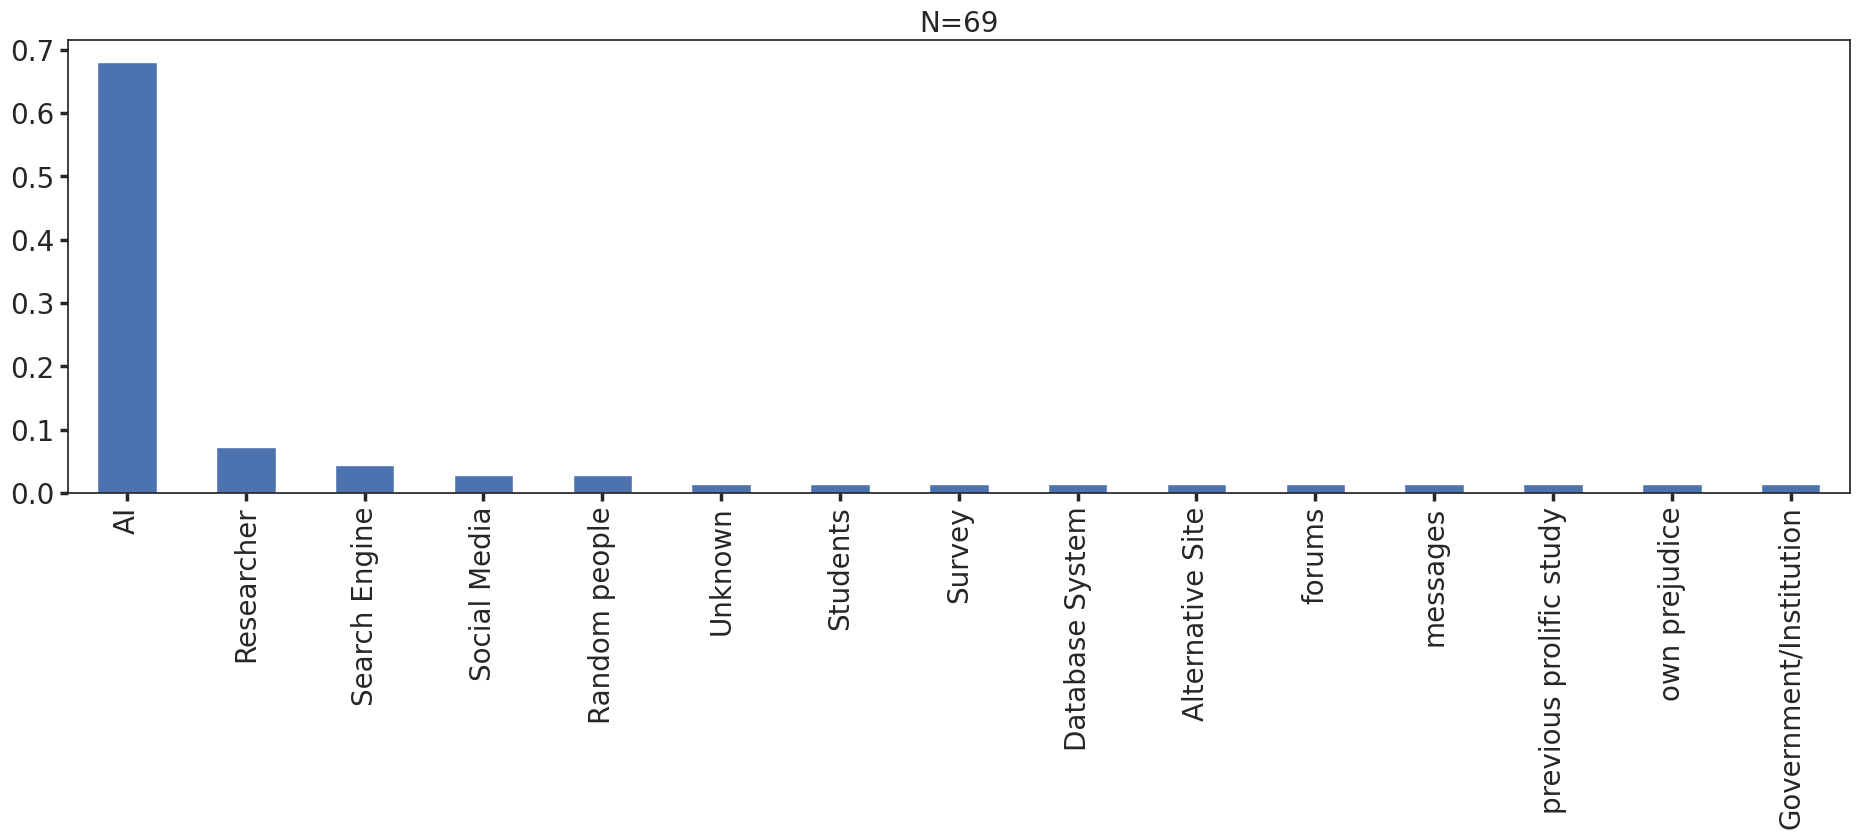

In [101]:
import pandas as pd


question = pd.DataFrame(
    {
        'prolific_id': [
            '61569ee5ec13f9d23135674e',
            '5bdb3a8a7d2000000160cc3a',
            '60ecb3f500857abf7ae07653',
            '5e1a5cd3cd15fa2dcea59c86',
            '62cfee5a0c2e87501bfb10bc',
            '5702c03e68c641000e0d754d',
            '62ceae04736349fd200814a0',
            '5870a098da731b000104a3ff',
            '6361626a199ea624d2a8b858',
            '5b9e90661641f90001d857ff',
            '5e4465013f75e52fc82f7096',
            '5fd7b5c1b6d6ef043967330c',
            '5e2b69d9cda3641bb38769b1',
            '63fc726d072344aa67fb98f7',
            '5ed51cadb2c5c106a6d1f561',
            '5ae64fb8c3c3ab00018f7e89',
            '58ab2477ea3d11000170e6e1',
            '5c3db89c112ad80001cab75e',
            '5c5404c24831db000161c5e8',
            '5d46c556fb0ce0001a04fd01',
            '6121190671d1042b24d8d67b',
            '6006a7b7f57a4801ea3a8323',
            '5ac64f340527ba0001c224fc',
            '62cebb481d8dff18f66ef320',
            '5f4ac049c374f51158b481ba',
            '57a5c633275be6000135b61c',
            '63473251dfa54bc71403c42a',
            '5dbcaecb740cc224d8d0985e',
            '5a17467d5d06850001b00c41',
            '63e62822e21e6a98fe55d267',
            '5e510d0760dd0913e45370dc',
            '5eb4396df04311266e7b5110',
            '616ef0bb9875de5db97fcb4c',
            '5aa6e3d04eecca0001ddfc96',
            '604fb38595629d1c47bdd8ae',
            '58c58d1493dac30001d49c3d',
            '5b08185856655d0001bbfb1b',
            '5e5521580ee1b951df544c3c',
            '5755c957eb80c4000741a9ce',
            '616c98c5821cbeeffb348e40',
            '60aa5aa9be013c928a5ac92e',
            '55b2d3f2fdf99b525bc839aa',
            '5b2837eca7cee100011dd1ae',
            '5b7dceae2b57a90001916438',
            '5fc6a6691dd15336fcc81742',
            '610a7e09afea7de62171c59d',
            '63dc3daf33ede5b0c14e397e',
            '5bb3b490763e440001853e4f',
            '63fb8d0d8736cf01d94cb230',
            '5d3e47ba29130a00015cd41d',
            '615edb3967bc743ac381a940',
            '63e55ecaa002eb54284210e8',
            '6150e5601a0e7a3fbcfb9bfb',
            '63469f35701f6b1eb1e76b1f',
            '6005f8260fead291c70fc06e',
            '60717a4513f00ff2df378f05',
            '60dca45abca3eb229bafdedf',
            '60db6a9490422a8ae4555563',
            '58aca85e0da7f10001de92d4',
            '6071a3faff84952d04771a21',
            '62cbebd0b3641f4745d7c863',
            '61bb372340db417c1a1389c6',
            '5aabf0385e19aa00013c21a5',
            '5c7fe02f3eaee4001614f81a',
            '612b285f53d29d3549618b96',
            '60ea38c4daf970d96f76fa96',
            '62a71f84d2f2f15e6cefae40',
            '61588a883213fd00ccae7c21',
            '63e51bd397b0f5edcbf78895',
        ],
        'answer': [
            'AI',
            'AI',
            'AI',
            'Social Media',
            'AI',
            'AI',
            'Researcher',
            'AI',
            'Random people',
            'AI',
            'AI',
            'Researcher',
            'AI',
            'AI',
            'AI',
            'Unknown',
            'AI',
            'Random people',
            'AI',
            'Search Engine',
            'Students',
            'AI',
            'AI',
            'Survey',
            'Database System',
            'AI',
            'AI',
            'Search Engine',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'Alternative Site',
            'AI',
            'AI',
            'forums',
            'AI',
            'AI',
            'Search Engine',
            'messages',
            'Researcher',
            'AI',
            'AI',
            'AI',
            'previous prolific study',
            'AI',
            'AI',
            'Researcher',
            'AI',
            'AI',
            'Researcher',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'own prejudice',
            'AI',
            'AI',
            'AI',
            'AI',
            'Social Media',
            'Government/Institution',
        ]})

question.answer.value_counts(normalize=True).plot(kind='bar')
import matplotlib.pyplot as plt
plt.title('N=' + str(question.prolific_id.nunique()))


In [184]:
f1 = 'HUMANS/turing_dv3_82.csv'
f2 = 'HUMANS/turing_109.csv'
f3 = 'HUMANS/turing_prolific_79.csv'
f4 = 'HUMANS/turing_dv2_humanized_79.csv'
f5 = 'HUMANS/turing_dv2_ai_67.csv'

df1 = pd.read_csv(f1)
df2 = pd.read_csv(f2)
df3 = pd.read_csv(f3)
df4 = pd.read_csv(f4)
df5 = pd.read_csv(f5)

for df, n_rows, engine in zip([df1, df2, df3, df4, df5], [135, 138, 138, 138, 147], ['dv3', 'dv2', 'dv2_prolific', 'dv2_humanized', 'dv2_ai']):
    df = df[df.prolific_id.isin(df.prolific_id.value_counts()[
                                df.prolific_id.value_counts() == n_rows].index)]
    df = df[~df.prolific_id.str.contains('anon')] 
    df = df[~df.prolific_id.str.contains('notfound')]

    print("complete =", (df.groupby('prolific_id').prolific_id.count() == n_rows).sum())
    print("incomplete =", (df.groupby(
        'prolific_id').prolific_id.count() != n_rows).sum())
    # print("dataset_id that are complete =", df.dataset_id.value_counts()==138)
    print("dataset_id that are incomplete =",
          [
              i for i in range(77)
              if i not in df.dataset_id.value_counts().index
          ])
    print("dataset_id that are complete =",
          [
              i for i in range(77)
              if i in df.dataset_id.value_counts().index
          ])

    print("dataset_id that are incomplete =",
          len(
              [i for i in range(77) if i not in df.dataset_id.value_counts().index]))

    df['correct'] = None
    df['correct'] = df.correct.astype(bool)
    df['agree1'] = None
    df['agree1'] = df.agree1.astype(bool)
    df['agree2'] = None
    df['agree2'] = df.agree2.astype(bool)

    print(set(df.answer.unique()))
    
    df.loc[df.q_id == 1, 'agree2'] = df.answer.str.contains('Yes')
    df.loc[df.q_id == 0, 'agree1'] = df.answer.str.contains('Yes')

    # clear weird characters in answers
    df.loc[df.answer.str.contains('Yes'), 'answer'] = 'Yes'
    df.loc[(df.answer.str.contains('No')) & (df.q_id!=2), 'answer'] = 'No'
    df.loc[(df.answer.str.contains('AI')) & (~df.answer.str.contains('Not')), 'answer'] = 'AI'
    df.loc[df.answer.str.contains('Human'), 'answer'] = 'Human'

    print(set(df.answer.unique()))

    df.loc[df.q_id == 2, 'correct'] = df.source == df.answer
    if engine == 'dv2_prolific':
        df.loc[df.q_id == 2, 'correct'] = \
            ((df.source == 'Human') & (df.answer == 'Prolific')) | ((df.source == 'AI') & (df.answer == 'Not Prolific'))
    if engine == 'dv2_ai':
        df.loc[df.q_id == 2, 'correct'] = \
            ((df.source == 'AI_humanized') & (df.answer == 'Not an AI')) | ((df.source == 'AI') & (df.answer == 'AI'))
        # df.loc[df.source=='AI_humanized', 'source'] = 'Human'
        # df.loc[df.answer=='Not an AI', 'answer'] = 'Human'


    # add correct and agree1 to all rows where item id is the same (easier to plot)
    for i in df.item_id.unique():
       df.loc[df.item_id == i, 'correct'] = \
           df[(df.item_id == i) & (df.q_id == 2)].correct.values[0]
       df.loc[df.item_id == i, 'agree1'] = \
           df[(df.item_id == i) & (df.q_id == 0)].agree1.values[0]
       df.loc[df.item_id == i, 'agree2'] = \
           df[(df.item_id == i) & (df.q_id == 1)].agree2.values[0]

       df.loc[df.item_id == i, 'turing'] = \
           df[(df.item_id == i) & (df.q_id == 2)].answer.values[0]

    ## df['agree1']
    #df['agree_both'] = df.agree1 & df.agree2
    #df['disagree_both'] = ~df.agree1 & ~df.agree2
    
    df['engine'] = engine
    
    exec(f'{engine} = df.copy()')

np.random.seed(123)
# TODO: keep only one subject per dataset id
ids_to_keep_dv2 = []
ids_to_keep_dv3 = []
for i in range(77):
    ids_to_keep_dv2.append(
        np.random.choice(dv2[dv2.dataset_id == i].prolific_id.unique()))
    try:
        ids_to_keep_dv3.append(
            np.random.choice(dv3[dv3.dataset_id == i].prolific_id.unique()))
    except:
        print('Index error', i)
dv2 = dv2[dv2.prolific_id.isin(ids_to_keep_dv2)]
dv3 = dv3[dv3.prolific_id.isin(ids_to_keep_dv3)]
# dv2_prolific = dv2_prolific[dv2_prolific.prolific_id.isin(ids_to_keep)]
# ids = dv2.groupby('dataset_id').prolific_id.transform('nunique') > 1
# print(ids)
df = pd.concat([dv2, dv3, dv2_prolific, dv2_humanized, dv2_ai])


complete = 82
incomplete = 0
dataset_id that are incomplete = [76]
dataset_id that are complete = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]
dataset_id that are incomplete = 1
{'Yes', 'Human', 'No', 'AI'}
{'Yes', 'Human', 'No', 'AI'}
complete = 112
incomplete = 0
dataset_id that are incomplete = []
dataset_id that are complete = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
dataset_id that are incomplete = 0
{'Human', 'No', 'ðŸ¨â\x8dðŸ¦°Human', 'âœYes', 'âœ˜No', 'AI', 'Yes', 'ðŸ¤AI'}
{'Yes'

In [139]:
N = []
for i, engine in enumerate(('dv2', 'dv3', 'dv2_prolific')):
    N.append(len(df[df.engine == engine].prolific_id.unique()))
    print('Engine=', engine, 'N=', N[i])

n_total = len(df.prolific_id.unique())
# assert n_total == sum(N)

str(question.prolific_id.isin(df[df.engine=='dv2_prolific'].prolific_id.unique()).sum()) + ' ids in dv2_prolific_last_question are in the main dataset'

Engine= dv2 N= 77
Engine= dv3 N= 76
Engine= dv2_prolific N= 79


'69 ids in dv2_prolific_last_question are in the main dataset'

In [58]:
# bonus for correct answers
bonus = df[(df.engine=='dv2_humanized') & (df.q_id==2) & (df.prolific_id=='61474f07f4cfbc50cb3b2f1e')].groupby('prolific_id').correct.sum() * .05
bonus = df[(df.engine=='dv2_humanized') & (df.q_id==2) & (df.prolific_id=='61474f07f4cfbc50cb3b2f1e')].drop_duplicates(subset='item_idx', keep="first").correct.sum() * .05
# prolific_ids = ["5edfeb15743509317e9ec17c", "563f5535cbd4c60011dc9466", "60a746a3455cbbaefa083a14", "5c473c74819d580001782651", "60c283d8d82adfb1f4930352", "609bf576ae7704934d02cb52", "5e0fa4276f6d3e6adfca658a", "62d999e7f5f2cde114f4169e", "5edfd8872ec6382f20a1cd90", "5b6362cefaf7d30001e379e7", "5dc04aba55b86247c9991f89", "63bea8c366059643bc8e19da", "59637ac5d6b02c0001439808", "63d3fff8d2afe2d70a9202ba", "62cee0344bbf495f81b5643a", "60da1f2c84d5d4b2e46989c1", "60b6356523a427d506df6952", "5a7e2b4217ef350001704f52", "5b62ebb3c831f00001f60468", "6295f0cc367a8cbba24c694c", "5ef5d78781f1a703a60bf48f", "62fb7e29586929061efccda2", "5d6ed96c3fe1ac001add3be8", "5df227eb99b2821302e8dd5b", "5b438f3f7aec830001bb1a9a", "60d35d4fc34710a66ac98957", "5edd71517bdc7e9b05873eb0", "5d8f382400980b0019e21098", "5a099b6ca383a100011b49ec", "6346921046fa377ce55acbc1", "62cee0344bbf495f81b5643a", "60da1f2c84d5d4b2e46989c1", "60b6356523a427d506df6952", "5a7e2b4217ef350001704f52", "5b62ebb3c831f00001f60468", "6295f0cc367a8cbba24c694c", "5ef5d78781f1a703a60bf48f", "62fb7e29586929061efccda2", "5d6ed96c3fe1ac001add3be8", "5df227eb99b2821302e8dd5b", "5b438f3f7aec830001bb1a9a", "60d35d4fc34710a66ac98957", "5edd71517bdc7e9b05873eb0", "5d8f382400980b0019e21098", "5a099b6ca383a100011b49ec", "6346921046fa377ce55acbc1", "5b2a72f7c293b90001732b89", "637edbf206dac758898095d1", "5df7552e451be54ec34ff402", "6267bc7ac5d20db4d11af754", "5bbbcd283895e3000163213f", "62b4688a155412edaf3f73a3", "5aa69552f053610001726fd2", "5e5137be2f1d9c163f82331d", "616730370609638f039e4b59"]
print(bonus)

for row in bonus.iteritems():
    # if row[0]=='5b5f5ec19351420001b7d473':
        # print(row[0]+ ',' + str(round(row[1], 2)))

    # if row 0 in 613ab311df99420815403fe9, 60772d61bc996f9fa5806f3f, 5effa1b1767027080863869d, 60e5cb4ca01a593fce9a379d, 6153144b6c389cb97e3169c3
    # if row[0] in (j
            # '5e5521580ee1b951df544c3c',
            # '55b2d3f2fdf99b525bc839aa',
            # '5755c957eb80c4000741a9ce',
            # '5b08185856655d0001bbfb1b',
            # '60aa5aa9be013c928a5ac92e',
            # '616c98c5821cbeeffb348e40',
            # '5b7dceae2b57a90001916438',
            # '5b2837eca7cee100011dd1ae'
    # ):
        # if row[0]  in prolific_ids:
    print(row[0]+ ',' + str(round(row[1], 2)))

        # print(row[0]+ ',' + str(round(row[1], 2)))

1.3


AttributeError: 'numpy.float64' object has no attribute 'iteritems'

<AxesSubplot:>

<AxesSubplot:xlabel='item_idx', ylabel='correct'>

(0.0, 1.0)

Text(0.5, 0, 'Trial')

<AxesSubplot:>

<AxesSubplot:xlabel='item_idx', ylabel='correct'>

(0.0, 1.0)

Text(0.5, 0, 'Trial')

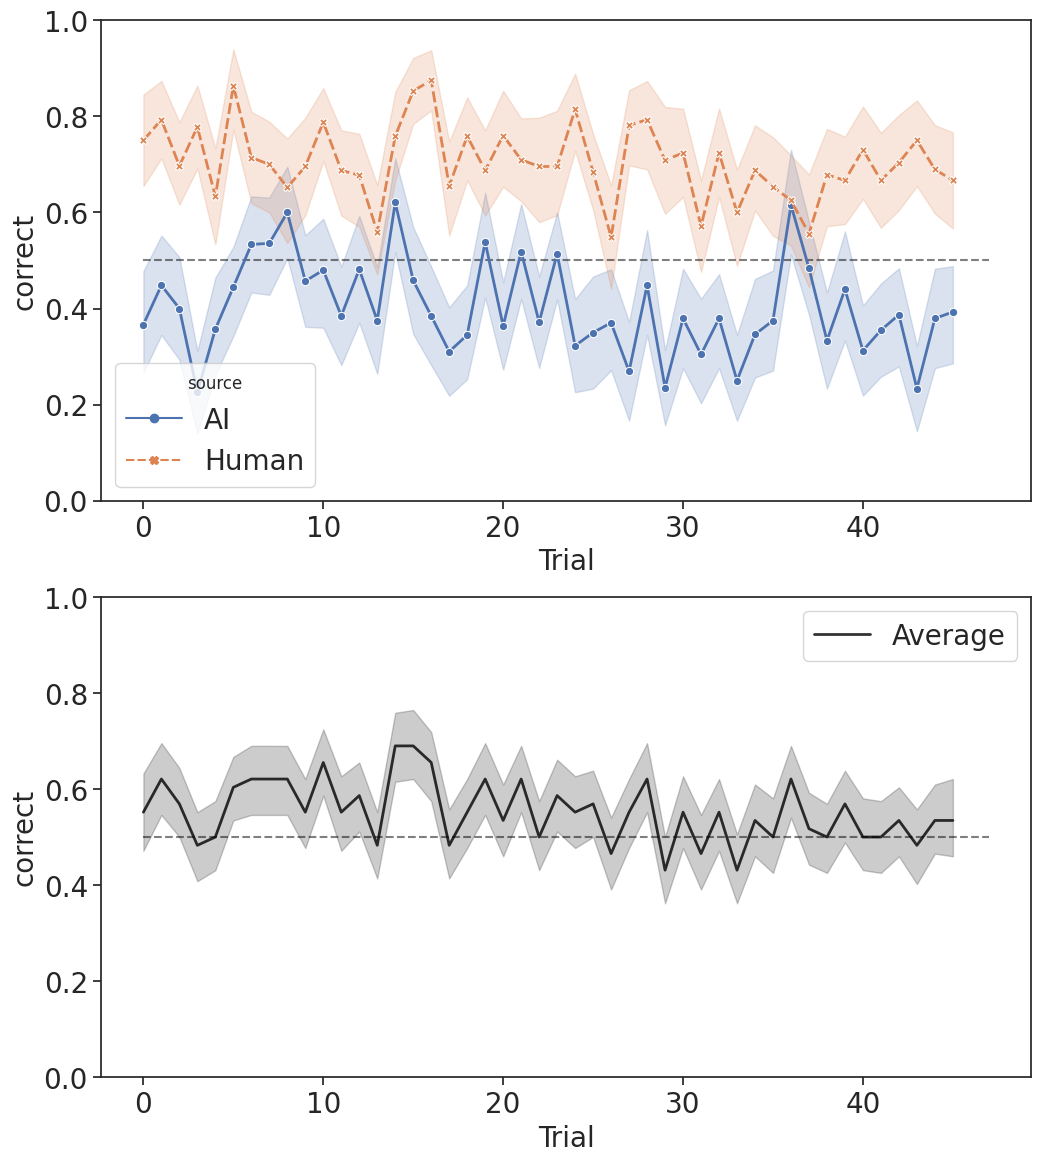

In [177]:
sns.set(
    rc={'figure.figsize':(12, 14), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20, 'xtick.labelsize': 20,
        'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False}
)

sns.set_palette('deep')
sns.set_style("ticks")

df2 = df[df.engine=='dv2_humanized']

# ----------------------------------------------------------------------------------------------------------------------
# PLOT 1
# ----------------------------------------------------------------------------------------------------------------------
plt.subplot(2, 1, 1)
plt.plot([0, 47], [0.5, 0.5], '--', color='black', alpha=0.5)
sns.lineplot(x='item_idx', y='correct', data=df2, hue='source',  legend=True, linewidth=2, markers=True, style='source')
plt.ylim(0, 1)
plt.xlabel('Trial')

# ----------------------------------------------------------------------------------------------------------------------
# PLOT 2
# ----------------------------------------------------------------------------------------------------------------------
plt.subplot(2, 1, 2)
plt.plot([0, 47], [0.5, 0.5], '--', color='black', alpha=0.5)
sns.lineplot(x='item_idx', y='correct', data=df2, color='black', linewidth=2, alpha=0.8, label='Average')
# sns.lineplot(x='item_idx', y='agree1', data=df,  legend=False, linewidth=2)
plt.ylim(0, 1)
plt.xlabel('Trial')

<AxesSubplot:xlabel='engine', ylabel='correct'>

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,engine,dv2,dv2_ai,False,True,4.0633,125.5365,two-sided,0.0001,0.0008,bonf,260.277,0.6564
1,engine,dv2,dv2_humanized,False,True,4.4978,152.0000,two-sided,0.0000,0.0001,bonf,1286.752,0.7249
2,engine,dv2,dv2_prolific,False,True,1.8386,153.9468,two-sided,0.0679,0.6790,bonf,0.812,0.2944
3,engine,dv2,dv3,False,True,-3.0337,150.5300,two-sided,0.0028,0.0285,bonf,11.111,-0.4907
4,engine,dv2_ai,dv2_humanized,False,True,0.5669,138.8787,two-sided,0.5717,1.0000,bonf,0.209,0.0948
5,engine,dv2_ai,dv2_prolific,False,True,-1.8830,128.6401,two-sided,0.0620,0.6196,bonf,0.902,-0.3004
6,engine,dv2_ai,dv3,False,True,-7.5041,121.0119,two-sided,0.0000,0.0000,bonf,1.02e+09,-1.2168
7,engine,dv2_humanized,dv2_prolific,False,True,-2.3167,131.8871,two-sided,0.0221,0.2206,bonf,1.997,-0.3689
8,engine,dv2_humanized,dv3,False,True,-7.9267,123.3843,two-sided,0.0000,0.0000,bonf,1.332e+10,-1.2856
9,engine,dv2_prolific,dv3,False,True,-4.8343,152.1562,two-sided,0.0000,0.0000,bonf,4781.054,-0.7773


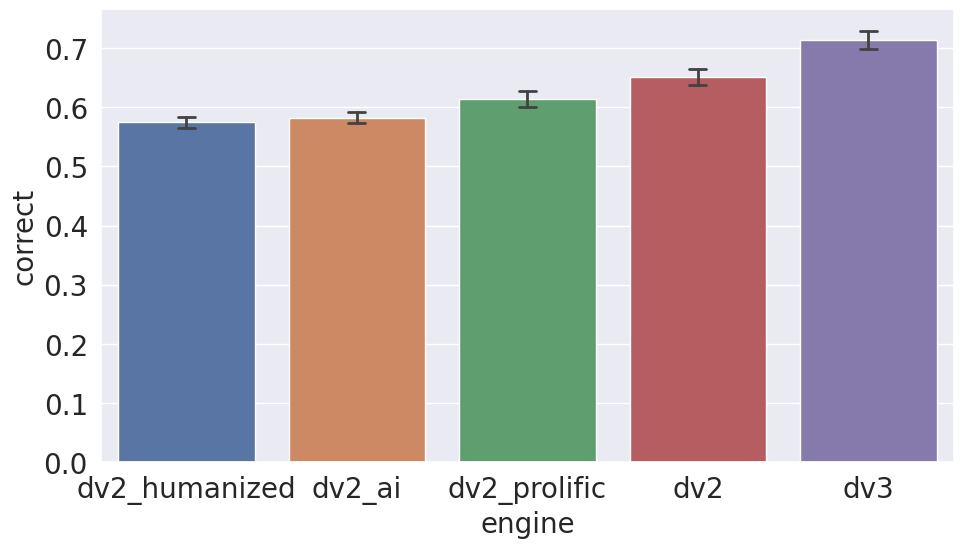

In [169]:
sns.set({'figure.figsize':(11, 6)})
df2 = df[df.q_id==2].groupby(['prolific_id', 'engine'], as_index=False).correct.mean()

sns.barplot(x='engine', y='correct', data=df2, order=['dv2_humanized', 'dv2_ai', 'dv2_prolific', 'dv2', 'dv3'], ci=68, capsize=.1, errwidth=2)
# plt.ylim(.4, .8)
# pg.ttest(df2[df2.engine=='dv2_humanized'].correct, df2[df2.engine=='dv2_ai'].correct)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pg.pairwise_ttests(dv='correct', between='engine', subject='prolific_id', data=df2, padjust='bonf', effsize='cohen', parametric=True)

In [77]:
df_all = pd.read_csv('H+GPT3/all_final.csv')
sns.set(
    rc={'figure.figsize':(23,12), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 13
        , 'ytick.labelsize': 13, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})

df_all['agree_a0'] = df_all.a0.str.contains('yes')
df_AI = df_all[df_all.source=='AI'].groupby(['title', 'cond'], as_index=False).agree_a0.mean().sort_values('title', ascending=False).rename(columns={'agree_a0': 'AI'})
df_Human = df_all[df_all.source=='Human'].groupby(['title', 'cond'], as_index=False).agree_a0.mean().sort_values('title', ascending=False).rename(columns={'agree_a0': 'H'})
diff = pd.concat([df_AI, df_Human.H], axis=1)
diff['diff'] = diff.AI - diff.H
# df_AI.drop('item_id', axis=1, inplace=True)
# df_Human.drop('item_id', axis=1, inplace=True)
# corr.corr()
diff['item_id'] = diff.index


# plt.subplot(2, 1, 1)
# sns.barplot(x='item_id', y='diff', data=diff, hue='cond', order=diff.sort_values(['diff', 'cond'], ascending=False).index)
# plt.ylabel('delta (AI - Human) agreement')
# # sns.heatmap(abs(df_AI.AI - df_Human.H), annot=True, cmap='RdBu_r', center=0, vmin=-1, vmax=1, cbar=False)

# plt.subplot(2, 2, 3)
# sns.scatterplot(x='AI', y='H', data=diff, hue='cond', legend=False)
# plt.annotate(f'corr={round(diff.corr().H.values[0], 2)}', xy=(.2, .5))


## add similarity score to df where title is the same in diff
# check if diff.title contains Sophie's Choice 
df.loc[df['title'].str.contains('Sophie'), 'title'] = 'Sophie Choice'
diff.loc[diff['title'].str.contains('Sophie'), 'title'] = 'Sophie Choice'
df['sim_score'] = df.title.apply(lambda x: diff[diff.title.str.contains(x)]['diff'].values[0])




/tmp/ipykernel_8357/2183732557.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')


<AxesSubplot:>

(0.0, 1.0)

(-0.1, 1.1)

([<matplotlib.axis.XTick at 0x7fbb46b2abb0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

Text(0.5, 1.0, 'Turing Test Accuracy')

([], [])

             T  dof alternative  p-val           CI95%  cohen-d       BF10  \
T-test -8.6350   76   two-sided 0.0000  [-0.29, -0.18]   1.3340  1.201e+10   

        power  
T-test 1.0000  
             T  dof alternative  p-val          CI95%  cohen-d   BF10  power
T-test -1.5815  152   two-sided 0.1158  [-0.08, 0.01]   0.2549  0.547 0.3490
              T  dof alternative  p-val          CI95%  cohen-d     BF10  \
T-test -14.5989  152   two-sided 0.0000  [-0.3, -0.23]   2.3528  2.0e+27   

        power  
T-test 1.0000  


<AxesSubplot:>

(0.0, 1.0)

(-0.1, 1.1)

([<matplotlib.axis.XTick at 0x7fbb46b864c0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

Text(0.5, 1.0, 'Agreement (Yes/No)')

([], [])

             T  dof alternative  p-val          CI95%  cohen-d   BF10  power
T-test -2.1350   76   two-sided 0.0360  [-0.06, -0.0]   0.2834  1.067 0.6898


<AxesSubplot:>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement (Justification)')

([<matplotlib.axis.XTick at 0x7fbb4881fbe0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

([], [])

             T  dof alternative  p-val          CI95%  cohen-d   BF10  power
T-test -0.1618   76   two-sided 0.8719  [-0.04, 0.03]   0.0228  0.127 0.0545


Text(0.4, 1.05, 'dv2')

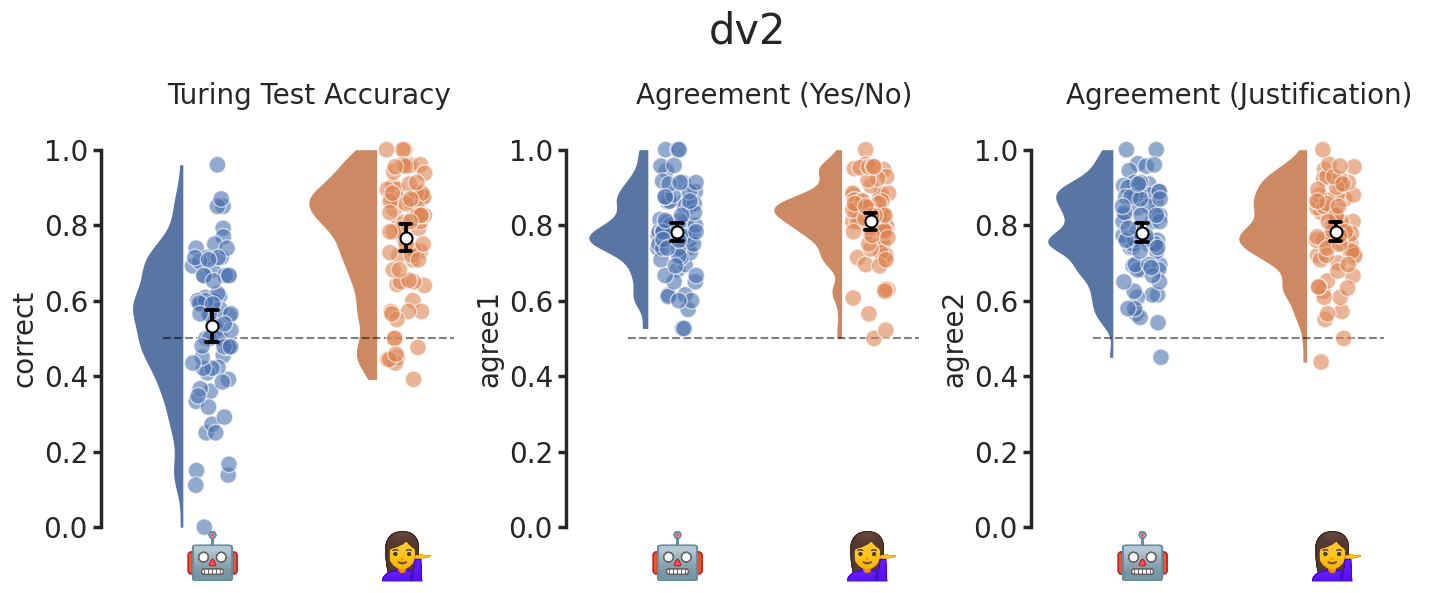

In [167]:
sns.set(
    rc={'figure.figsize':(23,6), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5

engine = 'dv2'

# -------------------------------------------------------------------------------
# Plot 1: Turing Test 
# -------------------------------------------------------------------------------
avg = df[(df.engine==engine)& (df.q_id==2)].groupby(['prolific_id', 'source'], as_index=False).correct.mean()
plt.subplot(1, 4, 1)
# sns.barplot(x='source', y='correct', data=avg, errorbar='se'
# sns.stripplot(x='source', y='correct', data=avg, alpha=0.5, jitter=0.1, size=15, color='black')
#
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
raincloud(x='source', y='correct', markersize=12, df=avg, order=['AI', 'Human'])
plt.ylim(0, 1)
plt.ylim(-.1, 1.1)
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.title('Turing Test Accuracy')
plt.xticks([])
plt.gca().spines['left'].set_linewidth(2.5)
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);

# AI correct and Human correct is significantly diff
print(pg.ttest(avg[avg.source=='AI'].correct, avg[avg.source=='Human'].correct, paired=True))
n = len(avg[avg.source=='AI'].correct)
print(pg.ttest(x=np.ones(n) * .5, y=avg[avg.source=='AI'].correct))
print(pg.ttest(x=np.ones(n) * .5, y=avg[avg.source=='Human'].correct))

# -------------------------------------------------------------------------------
# Plot 2: Agreement 1
# -------------------------------------------------------------------------------
avg = df[(df.engine==engine) & (df.q_id==0)].groupby(['prolific_id', 'source'], as_index=False).agree1.mean()
plt.subplot(1, 4, 2)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
raincloud(x='source', y='agree1', markersize=12, df=avg, order=['AI', 'Human'])
# sns.barplot(x='source', y='agree1', data=avg, errorbar='se')
# sns.stripplot(x='source', y='agree1', data=avg, color='black', alpha=0.5, jitter=0.1, size=15)
plt.ylim(0, 1)
plt.ylim(-.1, 1.1)
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.title('Agreement (Yes/No)')
plt.xticks([])
plt.gca().spines['left'].set_linewidth(2.5)
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
# AI agree1 and Human agree1 is significantly diff
print(pg.ttest(avg[avg.source=='AI'].agree1, avg[avg.source=='Human'].agree1, paired=True))
# n = len(avg[avg.source=='AI'].correct)
# print(pg.ttest(x=np.ones(n) * .5, y=avg[avg.source=='AI'].correct))
# print(pg.ttest(x=np.ones(n) * .5, y=avg[avg.source=='Human'].correct))

# -------------------------------------------------------------------------------
# Plot 3: Agreement 2
# -------------------------------------------------------------------------------
avg = df[(df.engine==engine) & df.q_id==1].groupby(['prolific_id', 'source'], as_index=False).agree2.mean()
plt.subplot(1, 4, 3)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
raincloud(x='source', y='agree2', markersize=12, df=avg, order=['AI', 'Human'])
# sns.barplot(x='source', y='agree2', data=avg, errorbar='se')
# sns.stripplot(x='source', y='agree2', data=avg, color='black', alpha=0.5, jitter=0.1, size=15)
plt.ylim(-.1, 1.1)
plt.title('Agreement (Justification)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.xticks([])
# AI agree2 and Human agree2 is significantly diff
print(pg.ttest(avg[avg.source=='AI'].agree2, avg[avg.source=='Human'].agree2, paired=True))


# -------------------------------------------------------------------------------
# Plot 4: RT
# -------------------------------------------------------------------------------
#avg = df.groupby(['prolific_id', 'source'], as_index=False).mean()
#plt.subplot(1, 4, 4)
## plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
## plt.plot([-1, 2], [0.5, 0.5], '--', color='black', alpha=0.5)
##sns.barplot(x='source', y='rt', data=avg, errorbar='se')
##sns.stripplot(x='source', y='rt', data=avg, color='black', alpha=0.5, jitter=0.1, size=15)
#raincloud(x='source', y='rt', markersize=12, df=avg, order=['AI', 'Human'])
#plt.ylim(0, 100000)
#plt.title('RT (ms)')
#plt.xlabel('')
#sns.despine(offset=10, trim=True, bottom=True);
#plt.xticks([])
#plt.gca().spines['left'].set_linewidth(2.5)
#for i, c in enumerate(avg.source.unique()):
#    offset_image(i, c, plt.gca(), size=0.3)
#
# plt.tight_layout()
plt.suptitle(engine, fontsize=30, horizontalalignment='center', y=1.05, x=0.4)

# ADD CORRECTNESS SCORE

In [139]:
print(list(df.item_id.unique()))

[3141, 3195, 2793, 940, 671, 191, 13, 1793, 2440, 510, 2102, 1978, 293, 1369, 334, 2617, 555, 3163, 1439, 3053, 827, 194, 3082, 3377, 2593, 2759, 1799, 3022, 178, 1835, 1922, 3260, 3512, 2301, 1614, 80, 2626, 1175, 641, 3538, 3394, 1906, 1754, 2051, 2855, 819, 627, 3550, 966, 1570, 832, 70, 392, 763, 73, 1391, 136, 1153, 2369, 1463, 2484, 3591, 2479, 1541, 1516, 3026, 2313, 2925, 212, 3434, 90, 920, 2360, 2361, 1993, 2257, 2230, 2141, 47, 570, 2557, 2191, 2238, 1868, 1631, 2536, 1350, 1013, 2551, 1238, 3526, 3191, 3181, 1020, 2435, 3004, 1536, 1370, 2546, 2414, 680, 375, 3244, 2988, 367, 1388, 1449, 2523, 1125, 1650, 2915, 1094, 2177, 865, 692, 2251, 1766, 2184, 2654, 2349, 1897, 441, 2222, 1080, 3458, 3164, 1860, 2166, 128, 3300, 2694, 812, 3157, 246, 3425, 3025, 3319, 3135, 1383, 1985, 1587, 1958, 1425, 1083, 1503, 350, 1154, 2554, 1005, 106, 2568, 193, 2289, 1850, 1677, 1769, 3027, 2387, 2628, 1615, 1904, 1603, 1686, 1980, 1035, 2374, 2843, 2186, 1984, 464, 482, 515, 2353, 1861, 104

In [159]:
def rule(x):
   dic = ['HIV', 'Mrs', 'VCR', 'Monday', 'Santiago', 'Morris']
   err = []
   for m in tool.check(x):
         if m.category in ('TYPOS', 'GRAMMAR') and m.ruleId not in ('UPPERCASE_SENTENCE_START', 'I_LOWERCASE'):
            if any(el in m.replacements for el in dic): 
               continue
            err.append(m)
   return len(err)

# df = df[df.engine=='dv2_ai']
unique_a1 = df.a1.unique()
new_df = pd.DataFrame({'a1': unique_a1, 'correctness': [None, ]*len(unique_a1)})
with ltp.LanguageTool('en-US', remote_server='http://localhost:8081') as tool:
    new_df['correctness'] = new_df.a1.apply(rule)
print('Finished checking correctness, apply to dv2 and dv3')
df['correctness'] = df.a1.apply(lambda x: new_df[new_df.a1==x].correctness.values[0])
#dv3['correctness'] = dv3.a1.apply(lambda x: new_df[new_df.a1==x].correctness.values[0])
#dv2.to_csv('HUMANS/dv2_77.csv')
#dv3.to_csv('HUMANS/dv3_76.csv')
# df[df.engine=='dv2_humanized'].to_csv('dv2_humanized_correctness.csv')

Finished checking correctness, apply to dv2 and dv3


<AxesSubplot:xlabel='source', ylabel='correctness'>

Text(0, 0.5, 'Errors')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-9.8172,298,two-sided,0.0000,"[-0.17, -0.12]",1.1336,5.786e+16,1.0000


array([ 2,  3,  4,  5,  6,  8,  9, 11, 13, 12, 17, 19, 18, 16, 20, 21, 24,
       27, 30, 33, 42, 25, 32, 28, 43, 46, 54, 56, 58, 64, 50, 65,  1,  7,
       14, 15, 23, 22, 29, 26, 34, 35, 36, 38, 40, 44, 47, 49, 41, 52, 51,
       48, 57, 53, 59, 60, 61, 37, 39, 62, 45, 55, 63, 66, 67, 10, 69, 68,
       70, 71, 72, 31, 75, 73,  0, 76, 74])

,respondent_id,source,engine,dataset_id,id_first,item_idx,item_id,q_id,rt,correct,agree1,agree2,choseLeft,correctness
0,0,AI,dv2_ai,35.5263,0.6579,25.4474,1862.1316,2.0000,50383.9211,0.5000,0.7368,0.7632,0.6053,0.0000
1,0,Human,dv2_ai,37.1053,0.5526,24.9474,1815.1053,2.0000,43626.3947,0.5789,0.6842,0.7105,0.5000,0.4211
2,1,AI,dv2_ai,28.1892,0.5135,27.2973,1582.7027,2.0000,43011.6486,0.6486,0.7027,0.7297,0.4054,0.0811
3,1,Human,dv2_ai,37.1951,0.6341,21.2683,1709.3171,2.0000,32521.4390,0.6098,0.8537,0.8293,0.4634,0.3659
4,2,AI,dv2_ai,31.0541,0.5405,25.8378,1545.3514,2.0000,59214.1892,0.5946,0.7027,0.7297,0.5676,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,8.0,AI,dv3,37.0556,0.4815,22.6296,1758.3704,2.0000,136107.9815,0.5556,0.8519,0.7963,NaN,0.1481
296,9.0,AI,dv2,40.5593,0.5085,22.0678,1901.2542,2.0000,40610.0339,0.5932,0.7966,0.7627,NaN,0.0678
297,9.0,AI,dv2_humanized,41.1404,0.4737,23.2807,1940.0000,2.0000,36635.3158,0.3509,0.8246,0.7719,0.6491,0.2982
298,9.0,AI,dv2_prolific,41.1404,0.4211,21.9123,1940.0000,2.0000,45570.4211,0.4737,0.8246,0.7368,0.5088,0.0702


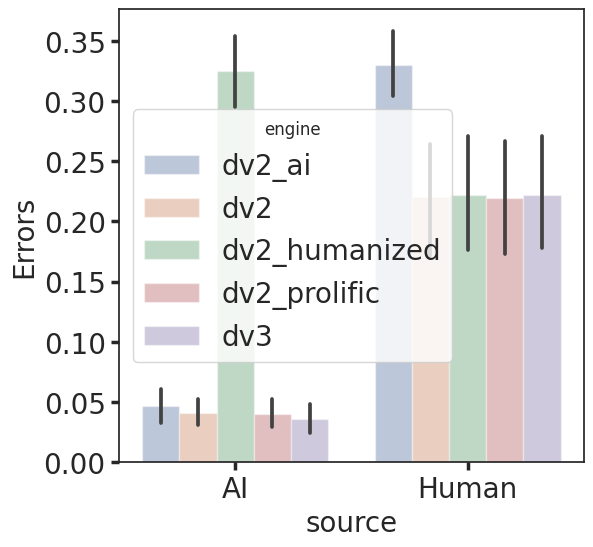

In [160]:
# df = pd.concat([dv2_ai, dv2_humanized], axis=0)
# df = dv2_humanized
# df.shape[0]/3
df2 = df[df.q_id==2].groupby(['respondent_id', 'source', 'engine'], as_index=False).mean()
sns.set({'figure.figsize': (6, 6)})
sns.set_style('ticks')
sns.barplot(x='source', y='correctness', hue='engine', data=df2, alpha=0.4)
# sns.stripplot(x='source', y='correctness', hue='engine', data=df, alpha=0.7, jitter=0.1, size=5, zorder=1)
plt.ylabel('Errors')
# plt.ylim(0, 6 )
pg.ttest(df2[df2.source=='AI'].correctness, df2[df2.source=='Human'].correctness, paired=False)
df.dataset_id.unique()
df2

,source,engine,dataset_id,id_first,item_idx,item_id,q_id,rt,choseLeft
0,AI,dv2,37.726655,0.490662,22.554612,1744.932654,1.0,41761.219015,NaN
1,AI,dv2_ai,17.585216,0.484600,23.724846,1818.478439,1.0,52978.870637,0.498289
2,AI,dv2_humanized,38.231031,0.496602,22.727633,1804.070215,1.0,39429.835787,0.498112
3,AI,dv2_prolific,37.301657,0.495580,22.440884,1760.807735,1.0,41863.607182,0.488398
4,AI,dv3,37.102238,0.523896,22.032668,1759.416818,1.0,44050.851785,NaN
5,Human,dv2,37.225352,0.490141,22.445634,1722.030423,1.0,39315.578028,NaN
6,Human,dv2_ai,18.111562,0.529412,24.271805,1804.647059,1.0,44640.208925,0.521974
7,Human,dv2_humanized,37.770270,0.497748,22.273649,1781.603604,1.0,39853.650338,0.510886
8,Human,dv2_prolific,36.776316,0.513706,22.558662,1735.283991,1.0,37703.255482,0.498721
9,Human,dv3,37.872100,0.499151,21.969440,1795.735144,1.0,38326.691002,NaN


array([True, False], dtype=object)

/tmp/ipykernel_8357/2092429412.py:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')
/tmp/ipykernel_8357/2092429412.py:55: RuntimeWarning: invalid value encountered in double_scalars
  'd_prime': float(stats.norm.ppf(hits['id'].values[i]) - stats.norm.ppf(false['id'].values[i]))})


<AxesSubplot:xlabel='engine', ylabel='d_prime'>

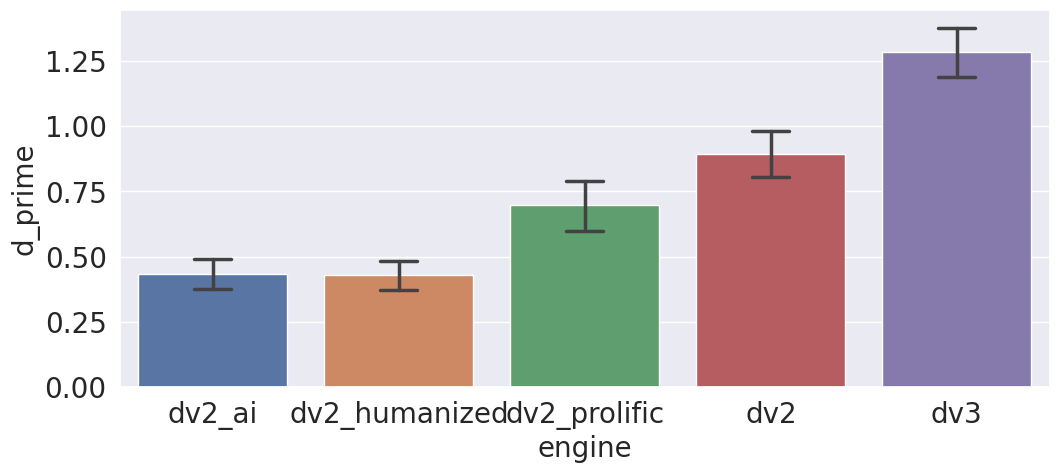

<AxesSubplot:>

(-3.0, 3.0)

Text(0.5, 1.0, 'Agreement (Yes/No)')

           n       r          CI95%  p-val   BF10  power
pearson  332 -0.0465  [-0.15, 0.06] 0.3979  0.098 0.1351
                            OLS Regression Results                            
Dep. Variable:                 agree1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7164
Date:                Fri, 02 Jun 2023   Prob (F-statistic):              0.398
Time:                        14:06:19   Log-Likelihood:                 259.25
No. Observations:                 332   AIC:                            -514.5
Df Residuals:                     330   BIC:                            -506.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

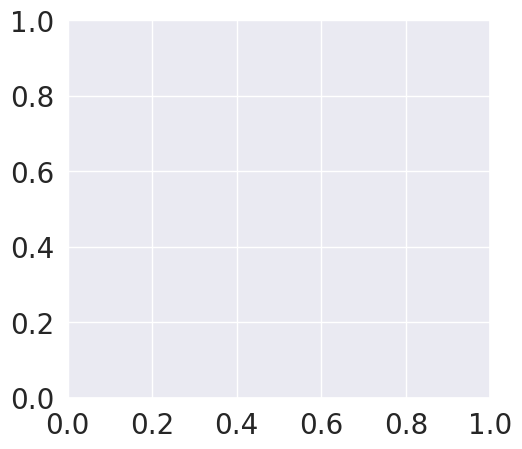

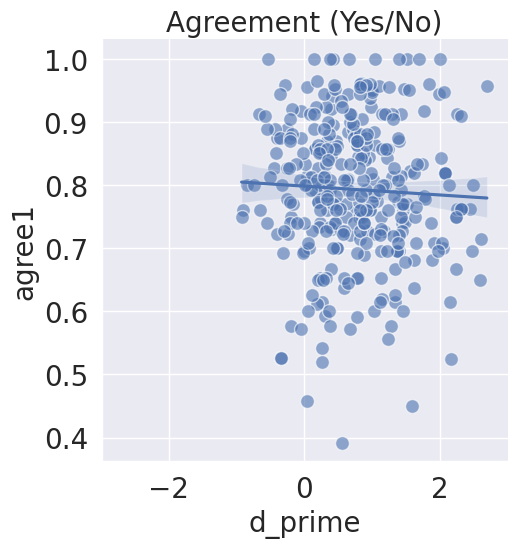

<AxesSubplot:>

(-3.0, 3.0)

Text(0.5, 1.0, 'Agreement (Justification)')

           n       r          CI95%  p-val   BF10  power
pearson  332 -0.0788  [-0.18, 0.03] 0.1520  0.191 0.2998
                            OLS Regression Results                            
Dep. Variable:                 agree2   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.062
Date:                Fri, 02 Jun 2023   Prob (F-statistic):              0.152
Time:                        14:06:20   Log-Likelihood:                 217.63
No. Observations:                 332   AIC:                            -431.3
Df Residuals:                     330   BIC:                            -423.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

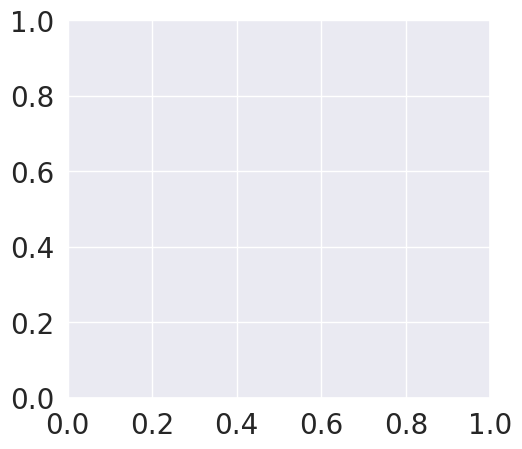

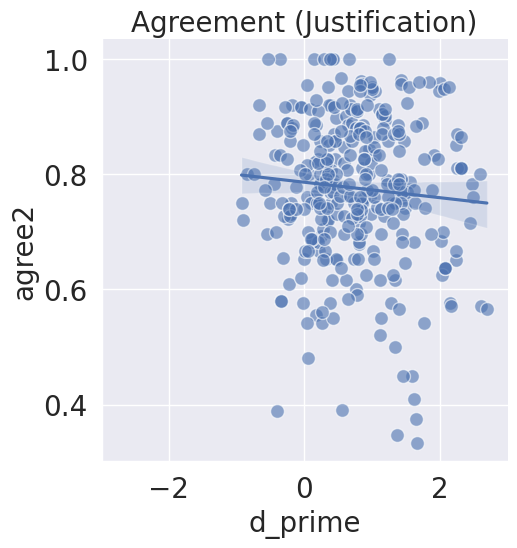

In [163]:
import scipy.stats as stats

sns.set(
    rc={'figure.figsize':(35,6), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5

false = pd.DataFrame()
hits = pd.DataFrame()

df['correct'] = df.correct.astype(int)
df['agree1'] = df.agree1.astype(int)
df['agree2'] = df.agree2.astype(int)

labels = ['id', 'agree1', 'agree2']
labels = ['id']
titles = ['Agreement (Yes/No)', 'Agreement (Justification)']

false['id'] = 1 - df[(df.source == 'Human') & (df.q_id == 2)
                     ].groupby('prolific_id', as_index=False).mean().correct
false['engine'] = df[(df.source == 'Human') & (df.q_id == 2)].groupby(['prolific_id', 'engine'], as_index=False).mean().engine
false['prolific_id'] = df[(df.source == 'Human') & (df.q_id == 2)].groupby('prolific_id', as_index=False).mean().prolific_id

hits['id'] = df[(df.source == 'AI') & (df.q_id == 2)].groupby(
    'prolific_id', as_index=False).mean().correct
hits['engine'] = df[(df.source == 'AI') & (df.q_id == 2)].groupby(['prolific_id', 'engine'],as_index=False).mean().engine
hits['prolific_id'] = df[(df.source == 'AI') & (df.q_id == 2)].groupby('prolific_id', as_index=False).mean().prolific_id

false['agree1'] = 1 - df[(df.source == 'Human') & (df.q_id == 0)
                         ].groupby('prolific_id', as_index=False).mean().agree1

hits['agree1'] = df[(df.source == 'AI') & (df.q_id == 0)].groupby(
    'prolific_id', as_index=False).mean().agree1
false['agree2'] = 1 - df[(df.source == 'Human') & (df.q_id == 1)
                         ].groupby('prolific_id', as_index=False).mean().agree2
hits['agree2'] = df[(df.source == 'AI') & (df.q_id == 1)].groupby(
    'prolific_id', as_index=False).mean().agree2

d = []
for i in range(false['id'].shape[0]):
    d.append({'agree1': hits['agree1'].values[i],
              'agree2': hits['agree2'].values[i],
              'engine': hits['engine'].values[i],
              'prolific_id': hits['prolific_id'].values[i],
              'd_prime': float(stats.norm.ppf(hits['id'].values[i]) - stats.norm.ppf(false['id'].values[i]))})

d = pd.DataFrame(d)  # plt.subplot(1, 4, 1)
d = d[~d.isin([np.nan, np.inf, -np.inf]).any(1)]

sns.set({'figure.figsize': (12,5), "figure.dpi": 100, 'legend.fontsize': 20,})
sns.barplot(x='engine', y='d_prime', data=d, ci=68, capsize=0.2, errwidth=2.5, edgecolor='white', order=['dv2_ai', 'dv2_humanized', 'dv2_prolific', 'dv2', 'dv3'])
plt.show()

count = 0
d['d_prime'] = d['d_prime'].astype(float)
d['agree1'] = d['agree1'].astype(float)
for agree in ('agree1', 'agree2'):
    count += 1
    # plt.clear()
    plt.subplot(1, 2, count)
    sns.lmplot(x='d_prime', y=agree, data=d, scatter_kws={
               'alpha': 0.6, 's': 100, 'edgecolor': 'white'})
# snspine(offset=10, trim=True)
    plt.gca().spines['left'].set_linewidth(2.5)
    plt.gca().spines['bottom'].set_linewidth(2.5)
    plt.xlim([-3, 3])
    plt.title(titles[count-1])
    print(pg.corr(d['d_prime'], d[agree]))
    print(sm.formula.ols(f'{agree} ~ d_prime', data=d).fit().summary())
    plt.show()

# add d_prime to the original dataframe to the corresponding prolific_id
def f(x):
    try:
        return d[d.prolific_id == x.prolific_id].d_prime.values[0]
    except:
        return np.NaN

# df['d_prime'] = df.apply(f, axis=1)
# for i in df.prolific_id.unique():
    # print(i)
    # assert d.prolific_id.isin([i]).any()

,d_prime,anti_AI_bias
d_prime,1.000000,-0.377711
anti_AI_bias,-0.377711,1.000000


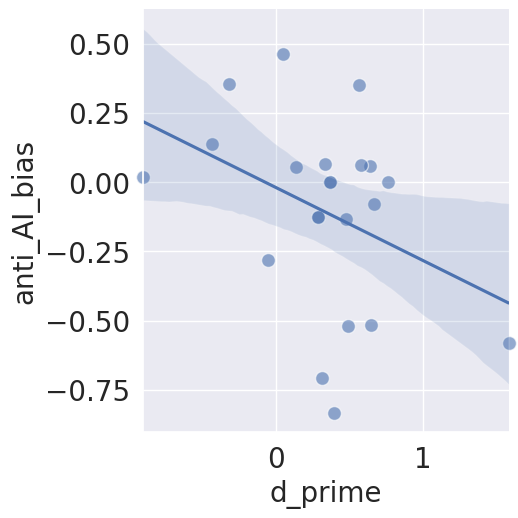

In [52]:
df2 = df[(df.source == 'Human') & (df.q_id == 2) & (df.engine=='dv2_humanized')].groupby(['prolific_id', 'correct'], as_index=False).mean()
new_df = []
for i in df2.prolific_id.unique():
    # new_df['antiAI'] =     print(i)
    # df2[(df2.correct == True) & (df2.prolific_id == i)]
    try:
        new_df.append({
            'd_prime': df2[df2.prolific_id == i].d_prime.values[0],
            'anti_AI_bias': df2[(df2.correct==False) & (df2.prolific_id==i)].agree2.values[0] - df2[(df2.correct == True) & (df2.prolific_id == i)].agree2.values[0]
        })
    except:
        continue

# sns.displot(antiAI)
new_df = pd.DataFrame(new_df)

sns.lmplot(x='d_prime', y='anti_AI_bias', data=new_df, scatter_kws=
           {'clip_on': False, 'alpha': 0.6, 's': 100, 'edgecolor': 'white'})
new_df.corr()

In [134]:
sns.set({'figure.figsize':(6,6), "figure.dpi": 100, 'legend.fontsize': 20,})
df['justif_len'] = df.a1.str.len()
dff = df[(df.q_id == 2) & (df.engine=='dv2')]
dff.loc[dff.answer=='AI', 'a'] = 1
dff.loc[dff.answer=='Human', 'a'] = 0
dff.loc[dff.agree1==True, 'agree1'] = 1
dff.loc[dff.agree1==False, 'agree1'] = 0

dff['agree1'] = dff['agree1'].astype(float)
print(sm.Logit.from_formula('agree1 ~ justif_len*correctness*correct', data=dff).fit().summary())
#sns.lmplot(x='justif_len', y='a', data=dff, logistic=True)
#plt.ylabel('ID Answer (AI=1, Human=0)')
#plt.xlabel('justification length')
#plt.annotate('***', xy=(0, 0), fontsize=20)

Optimization terminated successfully.
         Current function value: 0.498104
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 agree1   No. Observations:                 3542
Model:                          Logit   Df Residuals:                     3534
Method:                           MLE   Df Model:                            7
Date:                Tue, 23 May 2023   Pseudo R-squ.:                 0.01573
Time:                        18:01:37   Log-Likelihood:                -1764.3
converged:                       True   LL-Null:                       -1792.5
Covariance Type:            nonrobust   LLR p-value:                 7.903e-10
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.9282   

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/tmp/ipykernel_1341153/297445386

<AxesSubplot:ylabel='d_prime'>

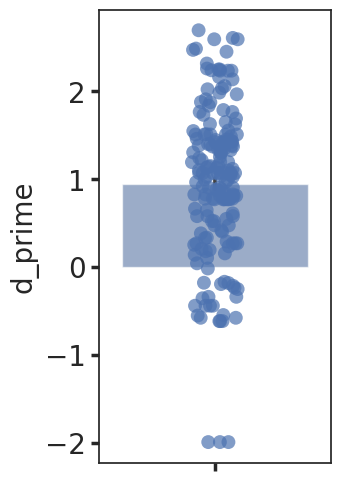

In [ ]:
sns.set({'figure.figsize':(3, 6), 'figure.dpi': 100, 'font.size': 13})
sns.set_style('ticks')
sns.barplot(y='d_prime', data=d, ci=68, alpha=.6)
sns.stripplot(y='d_prime', data=d, size=10, edgecolor='white', alpha=.7)

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

<AxesSubplot:ylabel='answer'>

<AxesSubplot:ylabel='answer'>

<AxesSubplot:ylabel='answer'>

(-0.1, 1.1)

Text(0.5, 1.0, 'dv2_ai')

([<matplotlib.axis.XTick at 0x7fbb49bc5790>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

([], [])

Text(0.5, 0, 'choice')

([], [])

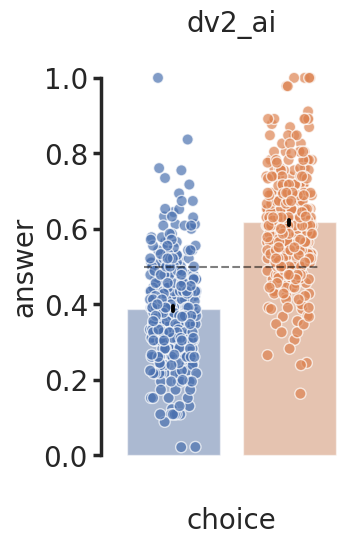

In [165]:

sns.set({'figure.figsize':(3, 6), 'figure.dpi': 100, 'font.size': 13})
sns.set_style('ticks')
sns.color_palette('deep')

# -------------------------------------------------------------------------------
# Plot: Consistency agreement
# -------------------------------------------------------------------------------
# engine = 'dv2_ai'
df2 = df.copy()
# df2 = df[(df.q_id==2) & (df.engine==engine)].copy()
df2.loc[df2.answer == 'Not Prolific', 'answer'] = 'AI'
df2.loc[df2.answer == 'Prolific', 'answer'] = 'Human'

x = df2[df2.q_id==2].groupby('prolific_id').answer.value_counts(normalize=True).keys().tolist()
x = [item[1] for item in x]
y = df2[df2.q_id==2].groupby('prolific_id').answer.value_counts(normalize=True)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)

# raincloud(x=x, y=y, markersize=12, df=None, order=['AI', 'Human'])
sns.barplot(x=x, y=y, ci=68, alpha=.5, zorder=0)
sns.stripplot(x=x, y=y,  alpha=0.7, jitter=0.2, size=8, linewidth=1, edgecolor='white', zorder=1)
sns.pointplot(x=x, y=y, ci=68, color='black', scale=0, errorbar='se', join=False, zorder=2)
plt.ylim(-.1, 1.1)
plt.title(engine)
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.xticks([])
plt.xlabel('choice')
plt.xticks([])
# for i, c in enumerate(avg.source.unique()):
    # offset_image(i, c, plt.gca(), size=0.2)



[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement (both)')

([<matplotlib.axis.XTick at 0x7f5b56d88a90>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

([], [])

Text(0.5, 0, '')

([], [])

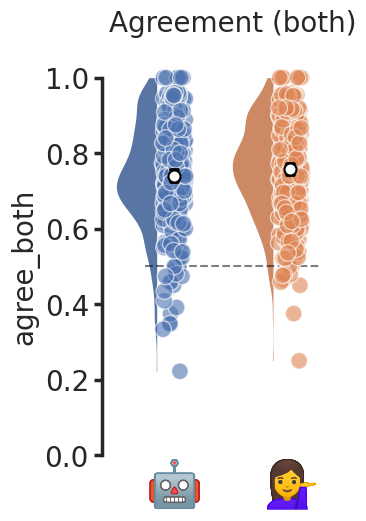

In [149]:
sns.set_style('ticks')
sns.color_palette('deep')
# -------------------------------------------------------------------------------
# Plot: Consistency agreement
# -------------------------------------------------------------------------------
avg = df[df.q_id.isin([0])].groupby(['prolific_id', 'source'], as_index=False).mean()
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
# sns.barplot(x='source', y='agree2', data=avg, errorbar='se')
# sns.stripplot(x='source', y='agree2', data=avg, color='black', alpha=0.5, jitter=0.1, size=15)
plt.ylim(-.1, 1.1)
plt.title('Agreement (both)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.xticks([])
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)



([], [])

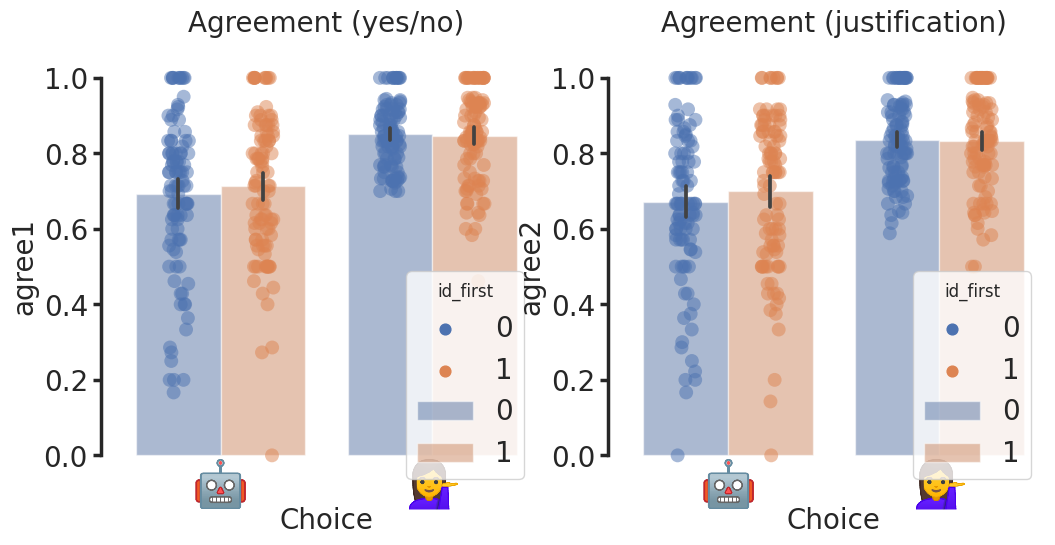

In [ ]:
sns.set({'figure.figsize':(12, 6), 'figure.dpi': 100, 'font.size': 13})
sns.set_style('ticks')
sns.color_palette('deep')
# -------------------------------------------------------------------------------
# Plot:  agreement according to id first
# -------------------------------------------------------------------------------
plt.subplot(1, 2, 1)
avg = df[df.q_id.isin([0])].groupby(['prolific_id', 'turing', 'id_first'], as_index=False).mean()
# plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='id_first', y='agree1', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='turing', y='agree1', data=avg,  hue='id_first', dodge=True, alpha=.5, zorder=0)
g = sns.stripplot(x='turing', y='agree1', data=avg, alpha=0.5, jitter=0.1,
    size=10, hue='id_first', dodge=True, edgecolor='white', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement (yes/no)')
plt.xlabel('Choice')
for i, c in enumerate(avg.turing.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True)
plt.gca().spines['left'].set_linewidth(2.5)
plt.xticks([])
plt.xticks([])

# -------------------------------------------------------------------------------
# Plot:  agreement justification according to id first
# -------------------------------------------------------------------------------
plt.subplot(1, 2, 2)
avg = df[df.q_id.isin([1])].groupby(['prolific_id', 'turing', 'id_first'], as_index=False).mean()
# plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='id_first', y='agree1', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='turing', y='agree2', data=avg,  hue='id_first', dodge=True, alpha=.5, zorder=0)
g = sns.stripplot(x='turing', y='agree2', data=avg, alpha=0.5, jitter=0.1,
    size=10, hue='id_first', dodge=True, edgecolor='white', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement (justification)')
for i, c in enumerate(avg.turing.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.xticks([])
plt.xlabel('Choice')
plt.xticks([])

<AxesSubplot:xlabel='source', ylabel='dataset_id'>

<AxesSubplot:xlabel='source', ylabel='dataset_id'>

Text(0, 0.5, 'N trials')

Text(0.5, 1.0, 'DV2 humanized')

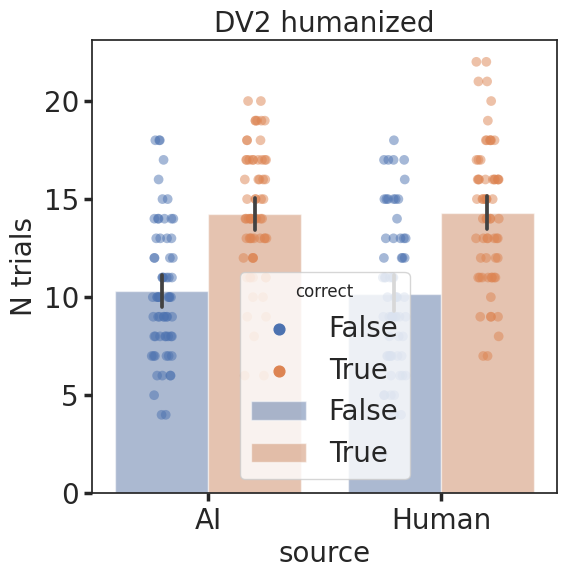

In [173]:
df2 = df[(df.engine=='dv2_ai') & (df.q_id==2)].groupby(['prolific_id', 'source', 'correct'], as_index=False).count()
sns.set({'figure.figsize':(6, 6), 'figure.dpi': 100, 'font.size': 13})
sns.set_style('ticks')
sns.barplot(x='source', y='dataset_id', data=df2, hue='correct', dodge=True, alpha=.5, zorder=0)
sns.stripplot(x='source', y='dataset_id', data=df2, alpha=0.5, jitter=0.1, size=7, hue='correct', dodge=True, zorder=1)
plt.ylabel('N trials')
plt.title('DV2 humanized')    

Size of dv2_ai dataset:  86.66666666666667


<AxesSubplot:>

<AxesSubplot:xlabel='source', ylabel='agree1'>

<AxesSubplot:xlabel='source', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7fbb45cc2df0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'Source')

ANOVA: VAR=agree1, ENGINE=dv2


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,source,0.0010,1,64,0.0010,0.0423,0.8378,0.8378,0.0001,1.0000
1,correct,0.0007,1,64,0.0007,0.0186,0.8920,0.8920,0.0001,1.0000
2,source * correct,0.0015,1,64,0.0015,0.0370,0.8481,0.8481,0.0002,1.0000


<AxesSubplot:>

<AxesSubplot:xlabel='source', ylabel='agree2'>

<AxesSubplot:xlabel='source', ylabel='agree2'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 2 (Justification)')

([<matplotlib.axis.XTick at 0x7fbb45c3fe50>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'Source')

ANOVA: VAR=agree2, ENGINE=dv2
             Source     SS  ddof1  ddof2     MS      F  p-unc  p-GG-corr  \
0            source 0.0041      1     64 0.0041 0.1619 0.6887     0.6887   
1           correct 0.1772      1     64 0.1772 5.0794 0.0276     0.0276   
2  source * correct 0.0012      1     64 0.0012 0.0216 0.8837     0.8837   

     ng2    eps  
0 0.0004 1.0000  
1 0.0174 1.0000  
2 0.0001 1.0000  


Text(0.5, 1.01, 'dv2_ai')

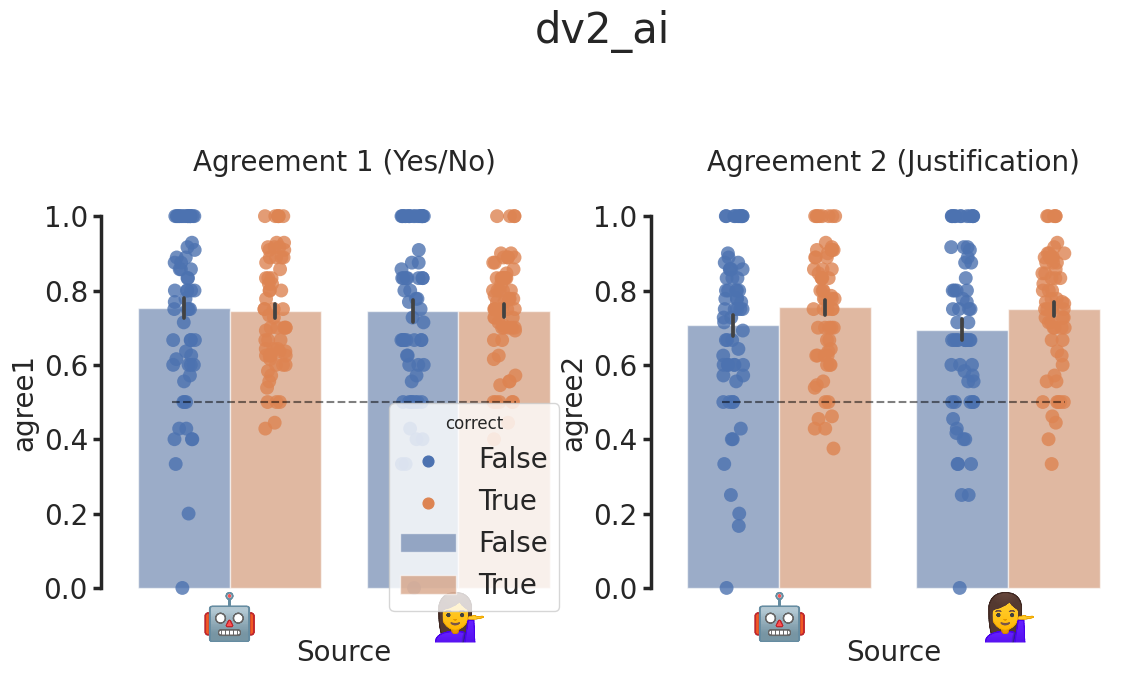

In [176]:

sns.set(
    rc={'figure.figsize':(13,13), "figure.dpi": 100, 'legend.fontsize': 20, 'axes.labelsize': 20, 'axes.titlesize': 20,
      'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and source + anova
# -------------------------------------------------------------------------------
engine = 'dv2_ai'
# ids = np.random.choice(df[(df.engine==engine) & (df.q_id == 0) & (df.cond!='non_moral')].prolific_id.unique(), 22, replace=False)
avg = df[(df.engine==engine) & (df.q_id == 2) & (df.cond!='non_moral')].groupby(['prolific_id', 'source', 'correct'], as_index=False).mean()
print(f'Size of {engine} dataset: ', avg.shape[0]/3)

plt.subplot(2, 2, 1)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='source', y='agree1', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0, dodge=True)
sns.stripplot(x='source', y='agree1', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement 1 (Yes/No)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)

plt.xlabel('Source')
# plt.legend([], [], frameon=False)
print('ANOVA: VAR=agree1, ENGINE=dv2')
pg.rm_anova(data=avg, dv='agree1', within=['source', 'correct'], subject='prolific_id', detailed=True)


# -------------------------------------------------------------------------------
# Plot:  agreement 2 per correct and source + anova
# -------------------------------------------------------------------------------
plt.subplot(2, 2, 2)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='source', y='agree2', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0)
sns.stripplot(x='source', y='agree2', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1, edgecolor='white')
plt.ylim(-.1, 1.1)
plt.title('Agreement 2 (Justification)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
plt.legend([], [], frameon=False)
plt.xlabel('Source')
print('ANOVA: VAR=agree2, ENGINE=dv2')
print(pg.rm_anova(data=avg, dv='agree2', within=['source', 'correct'], subject='prolific_id', detailed=True, correction='auto'))
plt.suptitle(engine, fontsize=30, y=1.01)

<AxesSubplot:>

Size of dv2 dataset:  101.0


<AxesSubplot:xlabel='answer', ylabel='agree1'>

<AxesSubplot:xlabel='answer', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7fbb48bb4070>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'answer')

Text(0.5, 1.0, 'dv2')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-7.3876,229.1989,two-sided,0.0000,"[-0.22, -0.13]",0.8564,4.561e+09,1.0000


<AxesSubplot:>

Size of dv3 dataset:  96.33333333333333


<AxesSubplot:xlabel='answer', ylabel='agree1'>

<AxesSubplot:xlabel='answer', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7fbb42bf35b0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'answer')

Text(0.5, 1.0, 'dv3')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.9633,235.6261,two-sided,0.0001,"[-0.13, -0.04]",0.4749,199.51,0.9803


<AxesSubplot:>

Size of dv2_prolific dataset:  102.66666666666667


<AxesSubplot:xlabel='answer', ylabel='agree1'>

<AxesSubplot:xlabel='answer', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7fbb487ca6d0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'answer')

Text(0.5, 1.0, 'dv2_prolific')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-8.4081,193.7760,two-sided,0.0000,"[-0.26, -0.16]",0.9676,3.306e+12,1.0000


<AxesSubplot:>

Size of dv2_ai dataset:  86.66666666666667


<AxesSubplot:xlabel='answer', ylabel='agree1'>

<AxesSubplot:xlabel='answer', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7fbb4875aee0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'answer')

Text(0.5, 1.0, 'dv2_ai')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.8958,129,two-sided,0.0044,"[-0.1, -0.02]",0.3598,5.214,0.9827


<AxesSubplot:>

Size of dv2_humanized dataset:  101.66666666666667


<AxesSubplot:xlabel='answer', ylabel='agree1'>

<AxesSubplot:xlabel='answer', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7fbb48894fa0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'answer')

Text(0.5, 1.0, 'dv2_humanized')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.5448,239.6080,two-sided,0.0005,"[-0.11, -0.03]",0.4080,46.692,0.9442


ANOVA: VAR=agree1, ENGINE=dv2


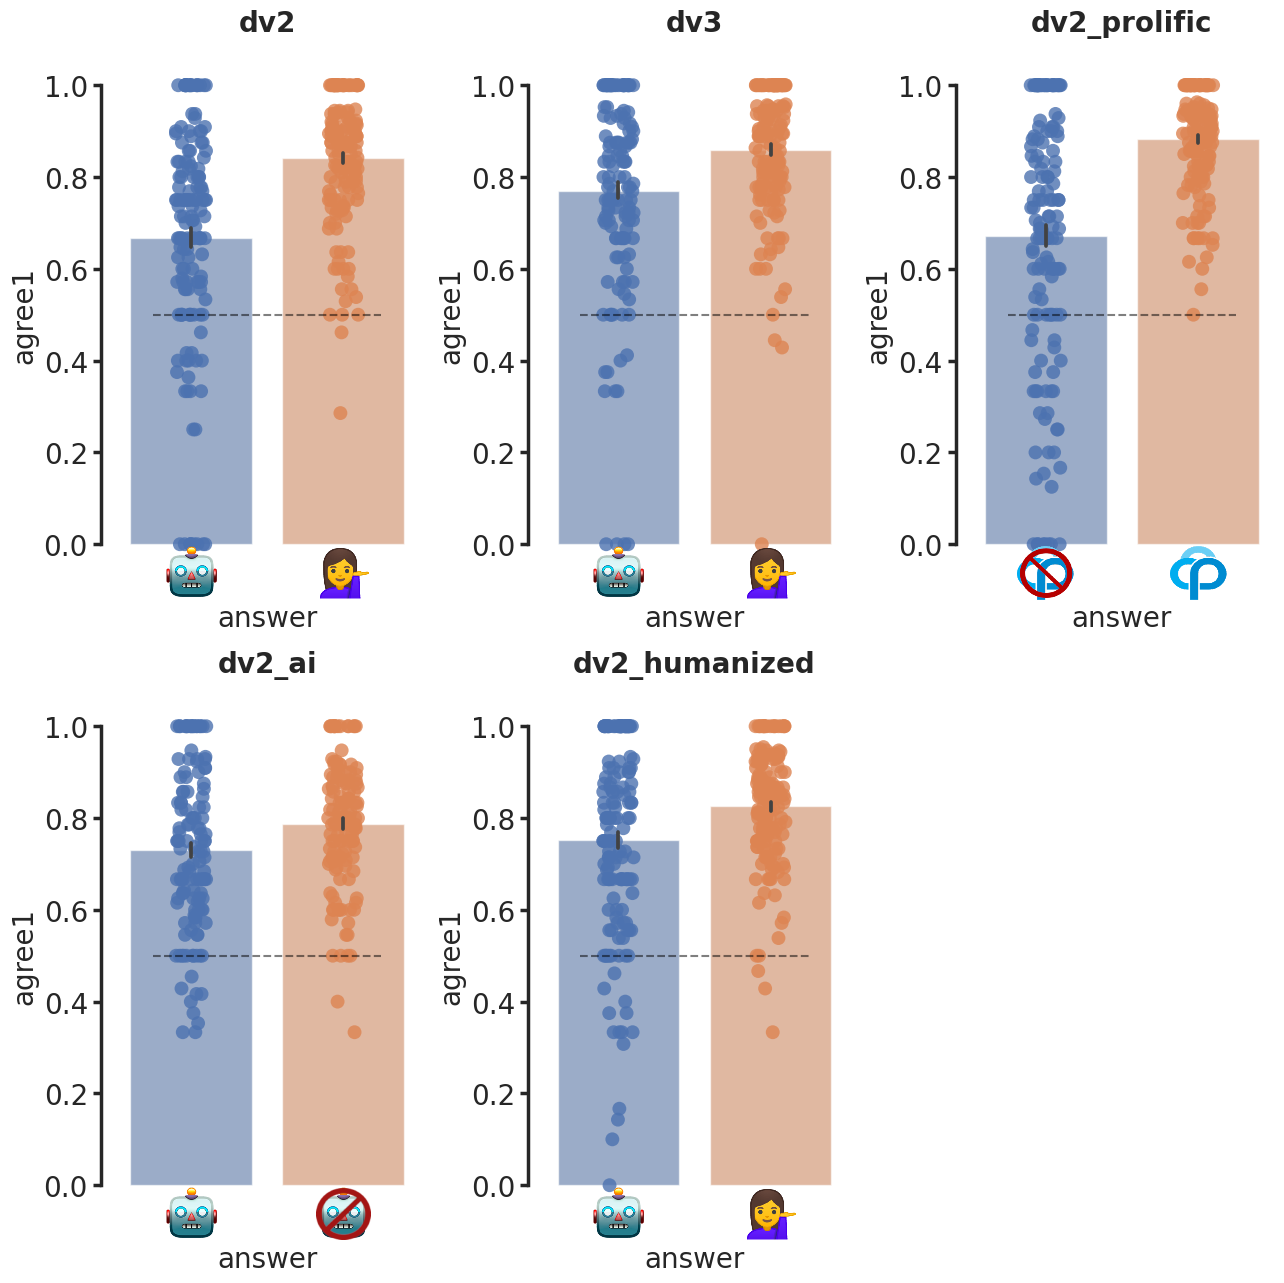

In [214]:
sns.set(
    rc={'figure.figsize':(13,13), "figure.dpi": 100, 'legend.fontsize': 20, 'axes.labelsize': 20, 'axes.titlesize': 20,
      'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")


count = 0
for engine in ['dv2', 'dv3', 'dv2_prolific', 'dv2_ai', 'dv2_humanized']:
    count += 1
    plt.subplot(2, 3, count)
#
# ids = np.random.choice(df[(df.engine==engine) & (df.q_id == 0) & (df.cond!='non_moral')].prolific_id.unique(), 22, replace=False)
    avg = df[(df.engine==engine) & (df.q_id == 2)].groupby(['prolific_id', 'answer', 'correct'], as_index=False).mean()
    print(f'Size of {engine} dataset: ', avg.shape[0]/3)
    # print(avg.answer.unique())
    plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
    sns.barplot(x='answer', y='agree1', data=avg, ci=68, alpha=0.6, zorder=0, dodge=True)
    sns.stripplot(x='answer', y='agree1', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, zorder=1)
    plt.ylim(-.1, 1.1)
    plt.title('Agreement 1 (Yes/No)')
    plt.xticks(range(2), ('', ''))
    plt.xlabel('')
    plt.xticks([])
    for i, c in enumerate(avg.answer.unique()):
        offset_image(i, c, plt.gca(), size=0.3)
    sns.despine(offset=10, trim=True, bottom=True);
    plt.gca().spines['left'].set_linewidth(2.5)
    plt.gca().spines['bottom'].set_linewidth(2.5)

    plt.xlabel('answer')
    plt.title(engine, fontweight='bold')
    answers = avg.answer.unique()
    pg.ttest(avg[avg.answer==answers[0]].agree1, avg[avg.answer==answers[1]].agree1, paired=True)
plt.tight_layout()
# plt.legend([], [], frameon=False)
print('ANOVA: VAR=agree1, ENGINE=dv2')
# pg.rm_anova(data=avg, dv='agree1', within=['source', 'correct'], subject='prolific_id', detailed=True)

<AxesSubplot:>

Size of dv2 dataset:  101.33333333333333


<AxesSubplot:xlabel='source', ylabel='agree1'>

<AxesSubplot:xlabel='source', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7fbb46adf790>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'source')

Text(0.5, 1.0, 'dv2')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.6173,259.6314,two-sided,0.1070,"[-0.01, 0.09]",0.1860,0.439,0.3658


<AxesSubplot:>

Size of dv3 dataset:  96.33333333333333


<AxesSubplot:xlabel='source', ylabel='agree1'>

<AxesSubplot:xlabel='source', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7fbb42d9d6d0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'source')

Text(0.5, 1.0, 'dv3')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.4254,263.4430,two-sided,0.1552,"[-0.01, 0.08]",0.1690,0.34,0.2989


<AxesSubplot:>

Size of dv2_prolific dataset:  102.66666666666667


<AxesSubplot:xlabel='source', ylabel='agree1'>

<AxesSubplot:xlabel='source', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7fbb42807610>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'source')

Text(0.5, 1.0, 'dv2_prolific')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.9326,303.7415,two-sided,0.3518,"[-0.08, 0.03]",0.1064,0.19,0.1536


<AxesSubplot:>

Size of dv2_ai dataset:  86.66666666666667


<AxesSubplot:xlabel='source', ylabel='agree1'>

<AxesSubplot:xlabel='source', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7fbb427c7ee0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'source')

Text(0.5, 1.0, 'dv2_ai')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.2864,129,two-sided,0.7750,"[-0.03, 0.04]",0.0333,0.102,0.0664


<AxesSubplot:>

Size of dv2_humanized dataset:  101.66666666666667


<AxesSubplot:xlabel='source', ylabel='agree1'>

<AxesSubplot:xlabel='source', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7fbb427b8100>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'source')

Text(0.5, 1.0, 'dv2_humanized')

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.9879,302.9763,two-sided,0.3240,"[-0.06, 0.02]",0.1131,0.201,0.1664


ANOVA: VAR=agree1, ENGINE=dv2


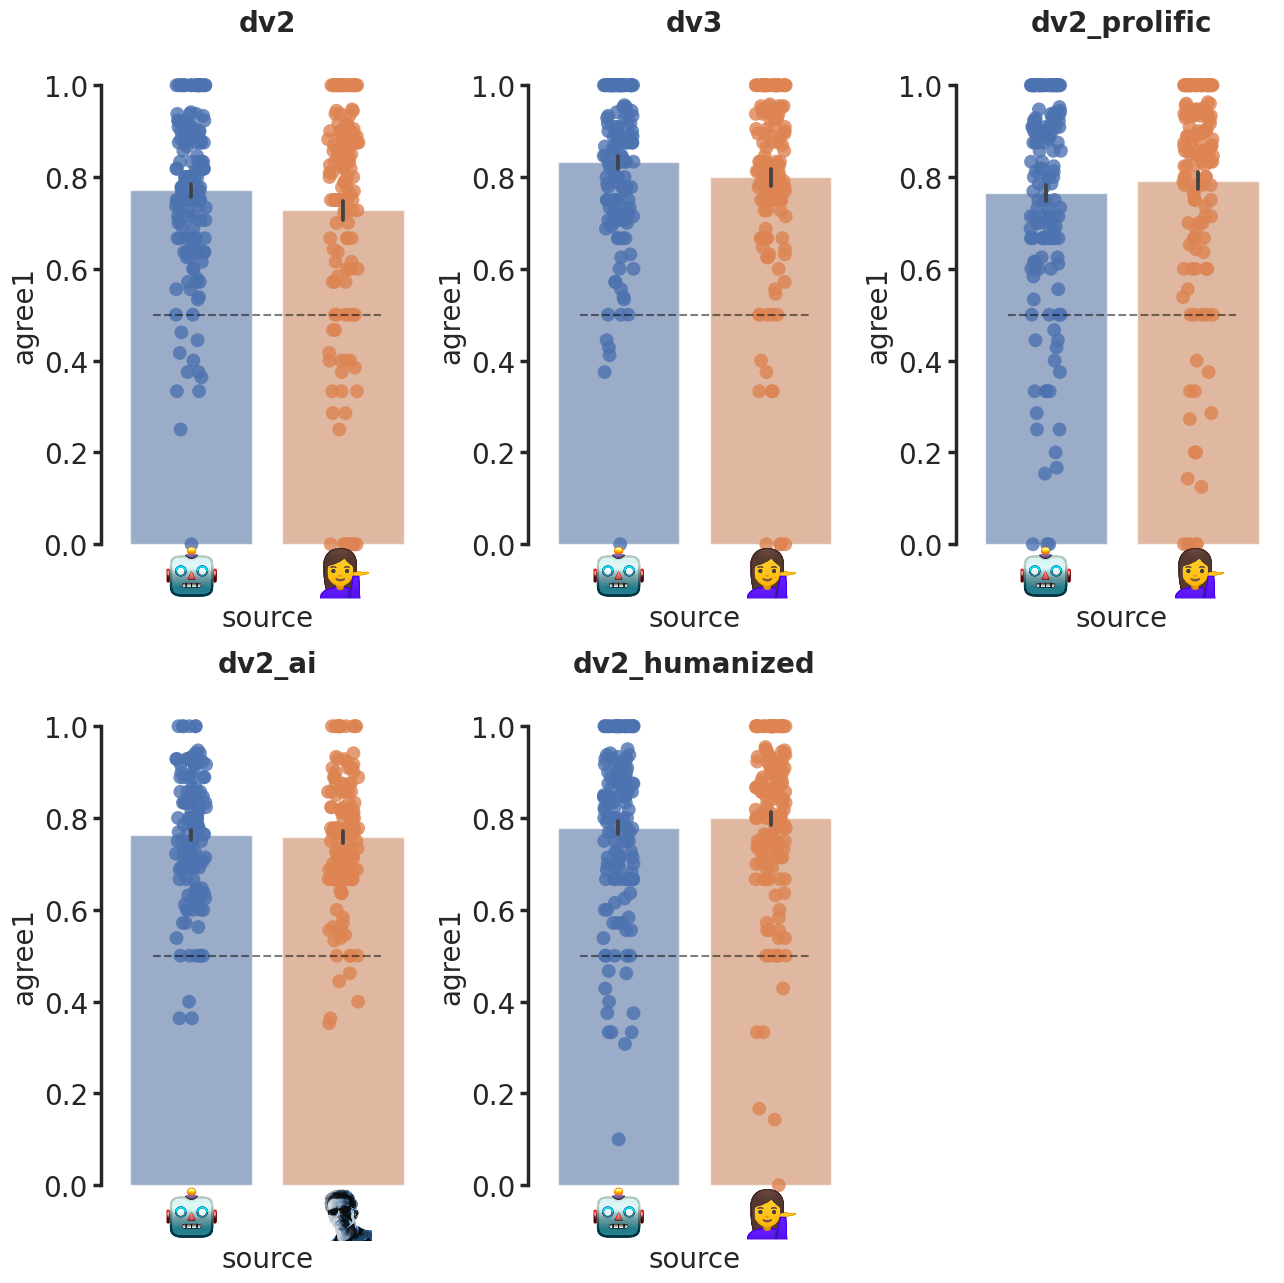

In [215]:
sns.set(
    rc={'figure.figsize':(13,13), "figure.dpi": 100, 'legend.fontsize': 20, 'axes.labelsize': 20, 'axes.titlesize': 20,
      'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")


count = 0
for engine in ['dv2', 'dv3', 'dv2_prolific', 'dv2_ai', 'dv2_humanized']:
    count += 1
    plt.subplot(2, 3, count)
#
# ids = np.random.choice(df[(df.engine==engine) & (df.q_id == 0) & (df.cond!='non_moral')].prolific_id.unique(), 22, replace=False)
    avg = df[(df.engine==engine) & (df.q_id == 2)].groupby(['prolific_id', 'source', 'correct'], as_index=False).mean()
    print(f'Size of {engine} dataset: ', avg.shape[0]/3)
    # print(avg.answer.unique())
    plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
    sns.barplot(x='source', y='agree1', data=avg, ci=68, alpha=0.6, zorder=0, dodge=True)
    sns.stripplot(x='source', y='agree1', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, zorder=1)
    plt.ylim(-.1, 1.1)
    plt.title('Agreement 1 (Yes/No)')
    plt.xticks(range(2), ('', ''))
    plt.xlabel('')
    plt.xticks([])
    for i, c in enumerate(avg.source.unique()):
        offset_image(i, c, plt.gca(), size=0.3)
    sns.despine(offset=10, trim=True, bottom=True);
    plt.gca().spines['left'].set_linewidth(2.5)
    plt.gca().spines['bottom'].set_linewidth(2.5)

    plt.xlabel('source')
    plt.title(engine, fontweight='bold')
    source = avg.source.unique()
    pg.ttest(avg[avg.source==source[0]].agree1, avg[avg.source==source[1]].agree1, paired=True)
plt.tight_layout()
# plt.legend([], [], frameon=False)
print('ANOVA: VAR=agree1, ENGINE=dv2')
#

Text(0.5, 0.98, 'DV3')

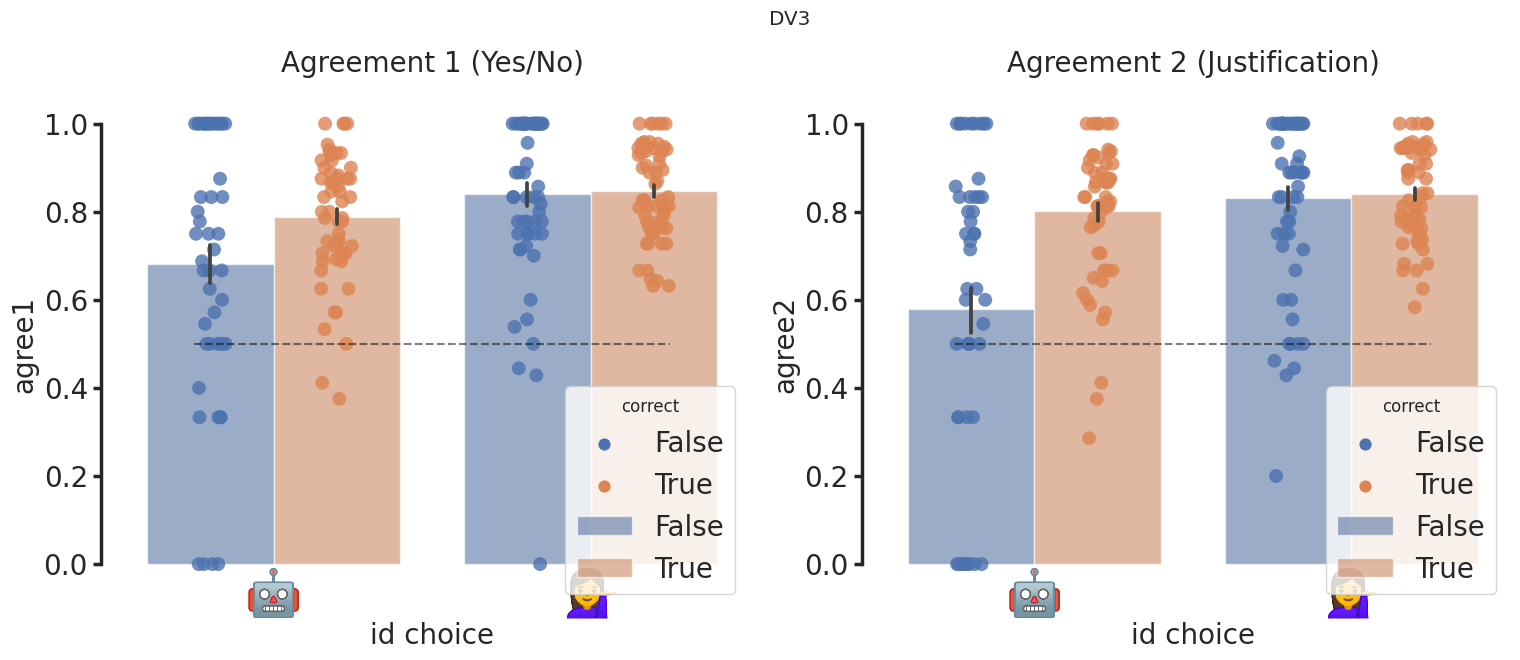

In [ ]:
sns.set(
    rc={'figure.figsize':(18,7), "figure.dpi": 100, 'legend.fontsize': 20, 'axes.labelsize': 20, 'axes.titlesize': 20,
      'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and turing + anova
# -------------------------------------------------------------------------------


#plt.subplot(1, 3, 1)
#plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
## raincloud(x='turing', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
#sns.barplot(x='turing', y='correct', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0, dodge=True)
#sns.stripplot(x='turing', y='correct', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1)
#plt.ylim(-.1, 1.1)
#plt.title('Correct identification')
#plt.xticks(range(2), ('', ''))
#plt.xlabel('id choice')
#plt.xticks([])
#for i, c in enumerate(avg.turing.unique()):
#    offset_image(i, c, plt.gca(), size=0.3)
#sns.despine(offset=10, trim=True, bottom=True);
#plt.gca().spines['left'].set_linewidth(2.5)
#plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
# print(pg.mixed_anova(data=avg, dv='correct', within='turing', between='correct', subject='prolific_id'))



# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and turing + anova
# -------------------------------------------------------------------------------

avg = df[df.engine=='dv3'].groupby(['prolific_id', 'turing', 'correct'], as_index=False).mean()

plt.subplot(1, 2, 1)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='turing', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='turing', y='agree1', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0, dodge=True)
sns.stripplot(x='turing', y='agree1', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement 1 (Yes/No)')
plt.xticks(range(2), ('', ''))

plt.xlabel('id choice')
plt.xticks([])
for i, c in enumerate(avg.turing.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
# print(pg.mixed_anova(data=avg, dv='agree1', within='turing', between='correct', subject='prolific_id'))


# -------------------------------------------------------------------------------
# Plot:  agreement 2 per correct and turing + anova
# -------------------------------------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='turing', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='turing', y='agree2', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0)
sns.stripplot(x='turing', y='agree2', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1, edgecolor='white')
plt.ylim(-.1, 1.1)
plt.title('Agreement 2 (Justification)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])

plt.xlabel('id choice')
for i, c in enumerate(avg.turing.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
plt.suptitle('DV3')
# plt.legend([], [], frameon=False)
# print(pg.rm_anova(data=avg, dv='agree2', within=['turing', 'correct'], subject='prolific_id', detailed=True))




In [ ]:
df.groupby(['prolific_id', 'source', 'correct'], as_index=False).size()


,prolific_id,source,correct,size
0,542460e3fdf99b691e6ac927,AI,True,51
1,542460e3fdf99b691e6ac927,Human,False,36
2,542460e3fdf99b691e6ac927,Human,True,48
3,5483702ffdf99b24c654b810,AI,False,45
4,5483702ffdf99b24c654b810,AI,True,21
...,...,...,...,...
659,63ea61d8106e3e2dc14c4cc7,Human,True,69
660,63ea627512244090788d46ec,AI,False,12
661,63ea627512244090788d46ec,AI,True,48
662,63ea627512244090788d46ec,Human,False,3


  Source        SS   DF        MS         F     p-unc       ng2       eps
0   cond  0.340806    2  0.170403  7.192593  0.000872  0.024048  0.970557
1  Error  8.055105  340  0.023691       NaN       NaN       NaN       NaN
  Source        SS   DF        MS          F         p-unc     p-GG-corr  \
0   cond  2.099979    2  1.049989  51.383346  3.174503e-20  2.747741e-18   
1  Error  6.947706  340  0.020434        NaN           NaN           NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.148092  0.890238      False  0.876705  0.000015  
1       NaN       NaN        NaN       NaN       NaN  


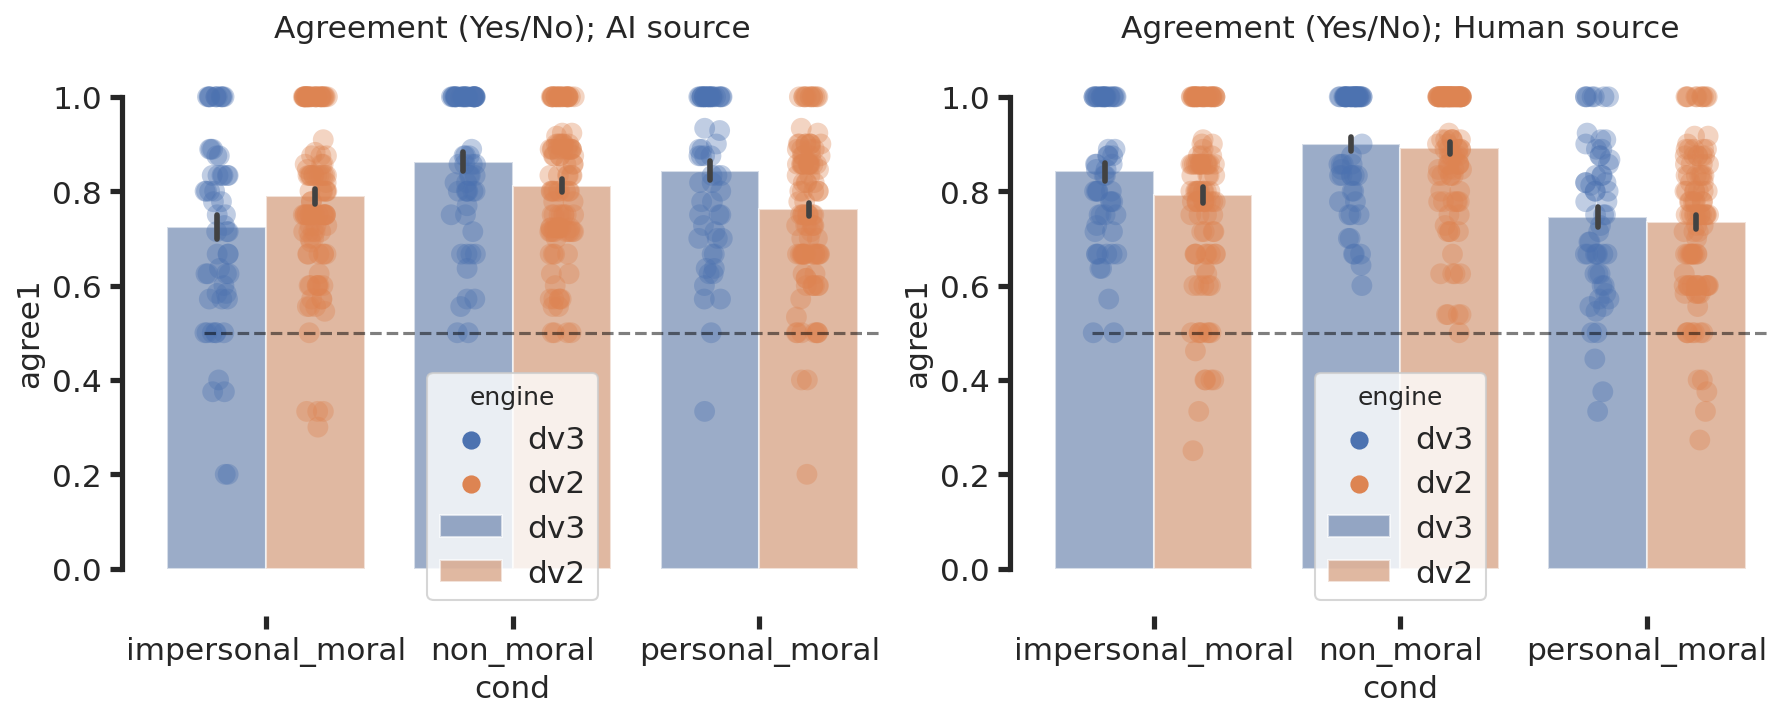

In [ ]:
sns.set(
    rc={'figure.figsize':(14,5), "figure.dpi": 150, 'legend.fontsize': 15, 'axes.labelsize': 15, 'axes.titlesize': 15,
      'xtick.labelsize': 15, 'ytick.labelsize': 15, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and source + anova
# -------------------------------------------------------------------------------

avg = df[df.source=='AI'].groupby(['prolific_id', 'cond', 'engine'], as_index=False).mean()
plt.subplot(1, 2, 1)
# avg = df.groupby(['prolific_id', 'cond', 'agree1'], as_index=False).mean()
plt.plot([-0.25, 3.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='cond', y='agree1', hue='engine',data=avg, ci=68, alpha=0.6)
sns.stripplot(x='cond', y='agree1', data=avg, hue='engine', alpha=0.35, jitter=0.1, size=10, dodge=True, zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement (Yes/No); AI source')
# plt.xticks(range(2), ('', ''))
# plt.xlabel('')
# plt.xticks([])
# for i, c in enumerate(avg.source.unique()):
    # offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
print(pg.rm_anova(data=avg, dv='agree1', within='cond', subject='prolific_id', detailed=True))


#plt.plot([-0.25, 3.25], [0.5, 0.5], '--', color='black', alpha=0.5)
## raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
#sns.barplot(x='cond', y='correct', data=avg, ci=68, alpha=0.6)
#sns.stripplot(x='cond', y='correct', data=avg, alpha=0.35, jitter=0.1, size=10, dodge=True, zorder=1)
#plt.ylim(-.1, 1.1)
#plt.title('Accuracy Turing')
#plt.xticks(range(2), ('', ''))
#plt.xlabel('')
#plt.xticks([])
## for i, c in enumerate(avg.source.unique()):
#    # offset_image(i, c, plt.gca(), size=0.3)
#sns.despine(offset=10, trim=True, bottom=True);
#plt.gca().spines['left'].set_linewidth(2.5)
#plt.gca().spines['bottom'].set_linewidth(2.5)
#plt.legend([], [], frameon=False)
#print(pg.rm_anova(data=avg, dv='correct', within='cond', subject='prolific_id', detailed=True))


# -------------------------------------------------------------------------------
# Plot:  agreement 2 per correct and source + anova
# -------------------------------------------------------------------------------
#
avg = df[df.source=='Human'].groupby(['prolific_id', 'cond', 'engine'], as_index=False).mean()
plt.subplot(1, 2, 2)
# avg = df.groupby(['prolific_id', 'cond', 'agree1'], as_index=False).mean()
plt.plot([-0.25, 3.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='cond', y='agree1', hue='engine',data=avg, ci=68, alpha=0.6)
sns.stripplot(x='cond', y='agree1', data=avg, hue='engine', alpha=0.35, jitter=0.1, size=10, dodge=True, zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement (Yes/No); Human source')
# plt.xticks(range(2), ('', ''))
# plt.xlabel('')
# plt.xticks([])
# for i, c in enumerate(avg.source.unique()):
    # offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
print(pg.rm_anova(data=avg, dv='agree1', within='cond', subject='prolific_id', detailed=True))
